# D208 Predictive Modeling Performance Assessment Task #1
## **Medical Readmission**

### Natalie Toler

## Table of Contents
### Part 1. Research Question
#### A1. Research Question
#### A2. Objective and Goals

### Part 2. Method Justificaiton
#### B1. Assumptions
#### B2. Programming Language
#### B3. Justification of Regression

### Part 3. Data Prepatation and Manipulation
#### C1. Data Cleaning
#### C2. Data Exploration
#### C3. Visualizations
#### C4. Data Transformation
#### C5. Prepared dataset

### Part 4. Model Comparison and Analysis
#### D1. Initial Model
#### D2. Model Reduction and Justification
#### D3. Reduced Model

#### E1. Model Comparison
#### E2. Residual Plot
#### E3. Code

### Part 5. Data Summary and Implications
#### F1. Regression Equation, etc
#### F2. Recommendations

### Part 6. Demonstration
#### G. Panopto Video

### Sources
#### H. Web Sources
#### I Source references

## Part 1

### A1. Research Question

Which variables effect the total charge for a patient?

### A2. Objective and Goals

The objective of my analysis is to see which observed variables, if any, effect the total charge of the hospital stay for a patient. 

## Part 2

### B1. Assumptions of Multiple Linear Regression Model

There are five assumptions when working with a multiple linear regression model. [The Five Assumptions of Multiple Linear Regression](https://www.statology.org/multiple-linear-regression-assumptions/) The dataset has to meet these assumptions in order for the regression to work. Four of the assumptions are the following: 

1. There must be a linear relationship between the dependent and independent variables. 
    When plotted on a scatterplot we should see a clear line form from the data points. 

2. There is no multicollinearity within the independent variables. 
    This means that none of the independent variables are highly correlated with each other. If independent variables are correlated with other independent variables that relationship will create unreliable coefficients in the model. 
    
3. Each observation in the dataset has been obtained randomly from the population being studied and independently.
    The data itself should be taken responsibly and ethically to maintain data integrity. 

4. The independent variables should not have homoscedasticity. 
    This means that the independent variables should be normally distributed with a mean of 0. If the variables deviate from a consistent varience then the model is more likely to present false significance. 

### B2. Programming Language

I will be using python as the programming language for this project. Python is an open source programming language with a vast array of libraries and packages that allow for flexibility and creativity when working on data projects. Since the syntax is consistent across libraries it is easy to grab new tools to cater to each specific question or goal of the project. Python code is also easy to recreate, update, and add to. [R or Python](https://www.wgu.edu/online-it-degrees/programming-languages/r-or-python.html) Within python I will be using the following resources:

- pandas which will handle reading and processing the dataset from the csv file. [Pandas](https://pandas.pydata.org/docs/getting_started/overview.html)
- NumPy which allows certain mathematics and categorizing of values in the dataset. [NumPy](https://numpy.org/devdocs/user/whatisnumpy.html)
- MatPlotLib which provides graphing functionality [MatPlotLib](https://matplotlib.org/stable/users/explain/quick_start.html)
- Seaborn which provides further customization of the graphs [Seaborn](https://seaborn.pydata.org/tutorial/introduction.html)
- SciPy and it's stats models which provide the functionality for the multple regression model, residual plotting, and finding issues of multicolinearity [SciPy StatsModels](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)
- sklearn which helps to transform the data [SciKit Learn](https://scikit-learn.org/stable/user_guide.html)

### B3. Justification of Regression

For the purpose of this project I will be using a multiple linear regression model. This model is a statistical tool that shows the relationship between a continuous dependent variable and either continuous and/or categorical independent variables. All regression models help to see the relationships between variables and since the dependent variable in my research question is that of the cost of the hospital stay, a continuous variable, and I will be testing it against multiple independent variables in the dataset, it is therefore the best choice to use the multiple linear regression model. 

## Part 3

### C1. Data Cleaning

My goal for the data cleaning step is to ensure uniformity within the structure of the data so that it will be easier to pull out the variables I want to work with for this project. Part of that structure includes detecting duplicates, fixing any null values as needed, and standardizing the names of the columns. Since I have worked with this data set before I have a good idea of the areas that need to be cleaned before I can start my analysis. 

I will use `info()` to check for null values and the datatypes for each column. I will also use `value_counts()` to look at the values of each column to ensure consistency. And I will use `nunique()` to check for any duplicated rows. 

Using my previous project in D206 I will be making some changes to the data. I will adjust the zipcodes so that the leading zeros return, I will restructure the timezones so that they are categorized by time zone alone and not additionally by the city. 

I will remap all boolean categories to be 1/0 binaries so that they can be used for the model. The survey questions can be encoded for nominal order, in the survey 1 is most likely and 8 is least likely. 
All categorical columns that are nominal I will be using the one hot encoding method so that those variables can be used in the model. The explanation and coding for these transformational methods will be explained and shown in C4.

I will also rename the columns to be consistently lowercase and with underscores and change the datatypes of the columns, specifically the categorical columns from string to category.

The process of cleaning is shown below with annotation in the code to explain the process.

In [1]:
# Before starting I will set up the space, loading in the needed libraries and data that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno
import seaborn as sb
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
%matplotlib inline

#Import the dataset and make sure the bonus column is not created.
df = pd.read_csv('medical_clean.csv', index_col=0)
# Check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [2]:
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [3]:
#Adjusting the Zipcode column 
# Convert the Zip column to a string and then pad any values with 4 numbers with a leading 0
df['Zip'] = df['Zip'].astype("str").str.zfill(5)

# Check the column type
df['Zip'].value_counts()

Zip
25674    4
78104    4
68355    4
62098    4
24136    4
        ..
18337    1
58442    1
71353    1
81612    1
15108    1
Name: count, Length: 8612, dtype: int64

In [4]:
# Check that all values are 5 long
all_have_five_values = all(len(str(value)) == 5 for value in df['Zip'])
print(all_have_five_values)

True


In [5]:
#Simplifying the Timezone categories
df.TimeZone.replace({
    # Puerto Rica has it's own time zone
    'America/Puerto_Rico' : "US - Puerto Rico",
    # All the cities in the US Eastern zone
    'America/New_York' : 'US - Eastern',
    'America/Detroit' : 'US - Eastern',
    'America/Indiana/Indianapolis' : 'US - Eastern',
    'America/Indiana/Vevay' : 'US - Eastern',
    'America/Indiana/Vincennes' : 'US - Eastern',
    'America/Kentucky/Louisville' : 'US - Eastern',
    'America/Toronto' : 'US - Eastern',
    'America/Indiana/Marengo' : 'US - Eastern',
    'America/Indiana/Winamac' : 'US - Eastern',
    # All the cities in US Central zone
    'America/Chicago' : 'US - Central',
    'America/Menominee' : 'US - Central',
    'America/Indiana/Knox' : 'US - Central',
    'America/Indiana/Tell_City' : 'US - Central',
    'America/North_Dakota/Beulah' : 'US - Central',
    'America/North_Dakota/New_Salem' : 'US - Central',
    # All the Cities in US Mountain zone
    'America/Denver' : 'US - Mountain',
    'America/Boise' : 'US - Mountain',
    # Arizona which is Mountain but doesn't observe day light savings
    'America/Phoenix' : 'US - Arizona',
    # The city in Pacific time
    'America/Los_Angeles' : 'US - Pacific',
    # Alaskan Time zone
    'America/Nome' : 'US - Alaskan',
    'America/Anchorage' : 'US - Alaskan',
    'America/Sitka' : 'US - Alaskan',
    'America/Yakutat' : 'US - Alaskan',
    # Hawaiian Time Zone that doesn't observe day light savings
    'Pacific/Honolulu' : 'US - Hawaiian',
    # Aleutian time zone that observes day light savings and otherwise would be with Hawaiian
    'America/Adak' : 'US - Aleutian'
    }, inplace = True)

df['TimeZone'].value_counts()

C:\Users\natal\AppData\Local\Temp\ipykernel_43368\318613104.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.TimeZone.replace({


TimeZone
US - Eastern        4326
US - Central        3792
US - Pacific         937
US - Mountain        698
US - Arizona         100
US - Alaskan          69
US - Puerto Rico      43
US - Hawaiian         34
US - Aleutian          1
Name: count, dtype: int64

In [6]:
#Changing Datatypes
#Convert area to category from string
df["Area"] = df["Area"].astype("category")
# Convert column to category from string
df["TimeZone"] = df["TimeZone"].astype("category")
# Convert column to category from string
df["Marital"] = df["Marital"].astype("category")
# Convert column to category from string
df["Gender"] = df["Gender"].astype("category")
# Convert column to category from string
df["Initial_admin"] = df["Initial_admin"].astype("category")
# Convert column to category from string
df["Complication_risk"] = df["Complication_risk"].astype("category")
# Convert column to category from string
df["Services"] = df["Services"].astype("category")

In [7]:
#Boolean columns remapped to 1/0 binary
# Recast object > boolean wants to turn everything True, need to map Yes/No to True/False
bool_mapping = {"Yes" : 1, "No" : 0}
# Convert column to boolean from string
df["ReAdmis"] = df["ReAdmis"].map(bool_mapping)
# Convert column to boolean from string
df["Soft_drink"] = df["Soft_drink"].map(bool_mapping)
# Convert column to boolean from string
df["HighBlood"] = df["HighBlood"].map(bool_mapping)
# Convert column to boolean from string
df["Stroke"] = df["Stroke"].map(bool_mapping)
# Convert column to boolean from string
df["Overweight"] = df["Overweight"].map(bool_mapping)
# Convert column to boolean from string
df["Arthritis"] = df["Arthritis"].map(bool_mapping)
# Convert column to boolean from string
df["Diabetes"] = df["Diabetes"].map(bool_mapping)
# Convert column to boolean from string
df["Hyperlipidemia"] = df["Hyperlipidemia"].map(bool_mapping)
# Convert column to boolean from string
df["BackPain"] = df["BackPain"].map(bool_mapping)
# Convert column to boolean from string
df["Anxiety"] = df["Anxiety"].map(bool_mapping)
# Convert column to boolean from string
df["Allergic_rhinitis"] = df["Allergic_rhinitis"].map(bool_mapping)
# Convert column to boolean from string
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].map(bool_mapping)
# Convert column to boolean from string
df["Asthma"] = df["Asthma"].map(bool_mapping)

In [8]:
# Convert Complication risk to 1, 2, 3 for low, medium, high
risk_mapping = {'High': 3, 'Medium': 2, 'Low': 1}
# Map the values in the "complication_risk" column using the defined mapping
df['Complication_risk'] = df['Complication_risk'].map(risk_mapping)
# Convert to int type
df['Complication_risk'] = df['Complication_risk'].astype(int)

In [9]:
# Define the ordered categorical datatype structure
survey_response = pd.CategoricalDtype(categories=["1", "2", "3", "4", "5", "6", "7", "8"], ordered=True)
# Apply the ordered categorical datatype to the columns
columns_to_encode = ["Item1", "Item2", "Item3", "Item4", "Item5", "Item6", "Item7", "Item8"]
for column in columns_to_encode:
    df[column] = df[column].astype(str)
    df[column] = df[column].astype(survey_response)

In [10]:
#Create a dataframe with only the variables we want
# Create new df with only the variables we're interested in
variables_df = df[['Area', 'Age', 'Income', 'Marital', 'Gender', 'VitD_levels', 'Initial_admin', 'HighBlood', 'Stroke',
                         'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia',
                         'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
                         'Services', 'Initial_days', 'TotalCharge']]

In [11]:
#Column renaming
# Generate and apply Pythonic names
pythonic_columns = ['area', 'age', 'income', 'marital', 'gender', 'vit_d', 'initial_admin', 'high_blood', 'stroke',
                    'complication_risk','overweight', 'arthritis', 'diabetes', 'hyperlipidemia', 'back_pain', 
                    'anxiety', 'allergic_rhinitis','reflux_esophagitis', 'asthma', 'services', 
                    'initial_days', 'total_charge']
variables_df = variables_df.set_axis(pythonic_columns, axis=1)

In [12]:
variables_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   area                10000 non-null  category
 1   age                 10000 non-null  int64   
 2   income              10000 non-null  float64 
 3   marital             10000 non-null  category
 4   gender              10000 non-null  category
 5   vit_d               10000 non-null  float64 
 6   initial_admin       10000 non-null  category
 7   high_blood          10000 non-null  int64   
 8   stroke              10000 non-null  int64   
 9   complication_risk   10000 non-null  int32   
 10  overweight          10000 non-null  int64   
 11  arthritis           10000 non-null  int64   
 12  diabetes            10000 non-null  int64   
 13  hyperlipidemia      10000 non-null  int64   
 14  back_pain           10000 non-null  int64   
 15  anxiety             10000 non-null  int64

### C2. Data Exploration

Now I will explore the statistical breakdown of the variables I have chosen for my project. This will include getting the mean, median, IQR, count statistics for the variables. These statistics show us what the most common value is, where the outliers may be, and what the distribution of each variable is. 

The first variable I want to look at is my dependent variable, the y, which is the total cost. 

The following variables are the quantitative variables that I will be exploring so I will be using `describe()` to find the statistics. 

The `describe()` function will show me:
 - count: the total number of entries for the columns
 - Mean: The mean is the average number which is found by adding each entry and dividing by the number of entries
 - Standard deviation: the measure of variation in the values, for example how spread out the values are from the mean
 - Minimum: the smallest observed value
 - 25th Percentile: The value where 25% of the data falls below, also known as the first quartile
 - 50th Percentile: The middle of the dataset when sorted in ascending order.
 - 75th Percentile: The value where 75% of the data falls below, also known as the third quartile
 - Maximum: The largest observed value

In [13]:
variables_df['total_charge'].describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: total_charge, dtype: float64

We can see there are no null values, the average total charge is 5312.17 and the middle is farily close at 5213.95. The least amount charged was 1938 and the most amount was 9180. Which is a pretty large distribution. 

On average the values within the dependent variable of Total_charge are 2180.39 units away from the mean of 5312.17. This suggests a moderate amound of variability in the values. 

In [14]:
variables_df['age'].describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: age, dtype: float64

Again no nulls. We can see that no patients under 18 were recorded in this dataset and the oldest patient was 89. On average the values are 20.63 away from the mean which is 53.51.

In [15]:
variables_df['income'].describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: income, dtype: float64

The mean of income is 40490.50 and the standard deviation is 28521.15 which is a significant distribution, showing how large the distribution of the income in this dataset is. 

In [16]:
variables_df['vit_d'].describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: vit_d, dtype: float64

With a standard deviation of 2 we can see that vit_d levels have a fairly small spread. 

In [17]:
variables_df['initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: initial_days, dtype: float64

The initial days has a medium standard deviation with values falling about 26.31 away from the mean of 34.46.

The next variables are categorical which means the statistics won't be useful for them so instead of using the `describe()` function I will use `value_counts()` to see the breakdown of responses. 

For these columns I will be getting the count for each option (1 = yes, 0 = no) and then I'll divide those by 100 to get the percentage for each option. I will also call the mode of each, which is the most common response. 

In [18]:
# Counts
category_counts = variables_df['high_blood'].value_counts()

# Percentages
category_percentages = variables_df['high_blood'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['high_blood'].mode()[0]

print("Summary Statistics for High Blood Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for High Blood Data:
0: Count=5910, Percentage=59.10%
1: Count=4090, Percentage=40.90%

Mode: 0


The most common value is not to have high blood pressure, and there is a 19% difference. 

In [19]:
# Counts
category_counts = variables_df['stroke'].value_counts()

# Percentages
category_percentages = variables_df['stroke'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['stroke'].mode()[0]

print("Summary Statistics for stroke Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for stroke Data:
0: Count=8007, Percentage=80.07%
1: Count=1993, Percentage=19.93%

Mode: 0


The most common value is no and a much larger difference of 61%

In [20]:
# Counts
category_counts = variables_df['complication_risk'].value_counts()

# Percentages
category_percentages = variables_df['complication_risk'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['complication_risk'].mode()[0]

print("Summary Statistics for complication_risk Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for complication_risk Data:
2: Count=4517, Percentage=45.17%
3: Count=3358, Percentage=33.58%
1: Count=2125, Percentage=21.25%

Mode: 2


In this case the most common value is 2 which was mapped onto medium risk. 

In [21]:
# Counts
category_counts = variables_df['overweight'].value_counts()

# Percentages
category_percentages = variables_df['overweight'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['overweight'].mode()[0]

print("Summary Statistics for overweight Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for overweight Data:
1: Count=7094, Percentage=70.94%
0: Count=2906, Percentage=29.06%

Mode: 1


The mode here is 1 which means that yes overweight is the most common value. 

In [22]:
# Counts
category_counts = variables_df['arthritis'].value_counts()

# Percentages
category_percentages = variables_df['arthritis'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['arthritis'].mode()[0]

print("Summary Statistics for arthritis Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for arthritis Data:
0: Count=6426, Percentage=64.26%
1: Count=3574, Percentage=35.74%

Mode: 0


The mode here is 0 which is no for arthritis. 

In [23]:
# Counts
category_counts = variables_df['diabetes'].value_counts()

# Percentages
category_percentages = variables_df['diabetes'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['diabetes'].mode()[0]

print("Summary Statistics for diabetes Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for diabetes Data:
0: Count=7262, Percentage=72.62%
1: Count=2738, Percentage=27.38%

Mode: 0


The mode here is 0 which is no for diabetes. 

In [24]:
# Counts
category_counts = variables_df['hyperlipidemia'].value_counts()

# Percentages
category_percentages = variables_df['hyperlipidemia'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['hyperlipidemia'].mode()[0]

print("Summary Statistics for hyperlipidemia Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for hyperlipidemia Data:
0: Count=6628, Percentage=66.28%
1: Count=3372, Percentage=33.72%

Mode: 0


The mode is 0 which is no for hyperlipidemia. 

In [25]:
# Counts
category_counts = variables_df['back_pain'].value_counts()

# Percentages
category_percentages = variables_df['back_pain'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['back_pain'].mode()[0]

print("Summary Statistics for back_pain Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for back_pain Data:
0: Count=5886, Percentage=58.86%
1: Count=4114, Percentage=41.14%

Mode: 0


The mode is 0 which is no for backpain, however the difference is only 17%

In [26]:
# Counts
category_counts = variables_df['anxiety'].value_counts()

# Percentages
category_percentages = variables_df['anxiety'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['anxiety'].mode()[0]

print("Summary Statistics for anxiety Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for anxiety Data:
0: Count=6785, Percentage=67.85%
1: Count=3215, Percentage=32.15%

Mode: 0


The mode is 0, so no for anxiety.

In [27]:
# Counts
category_counts = variables_df['allergic_rhinitis'].value_counts()

# Percentages
category_percentages = variables_df['allergic_rhinitis'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['allergic_rhinitis'].mode()[0]

print("Summary Statistics for allergic_rhinitis Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for allergic_rhinitis Data:
0: Count=6059, Percentage=60.59%
1: Count=3941, Percentage=39.41%

Mode: 0


The mode here is 0 so no for allergic rhinitis.

In [28]:
# Counts
category_counts = variables_df['reflux_esophagitis'].value_counts()

# Percentages
category_percentages = variables_df['reflux_esophagitis'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['reflux_esophagitis'].mode()[0]

print("Summary Statistics for reflux_esophagitis Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for reflux_esophagitis Data:
0: Count=5865, Percentage=58.65%
1: Count=4135, Percentage=41.35%

Mode: 0


The mode here is 0, no for reflux esophagitis however there is only a 17% difference. 

In [29]:
# Counts
category_counts = variables_df['asthma'].value_counts()

# Percentages
category_percentages = variables_df['asthma'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['asthma'].mode()[0]

print("Summary Statistics for asthma Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for asthma Data:
0: Count=7107, Percentage=71.07%
1: Count=2893, Percentage=28.93%

Mode: 0


The mode here is 0, no for asthma. 

In [30]:
# Counts
category_counts = variables_df['area'].value_counts()

# Percentages
category_percentages = variables_df['area'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['area'].mode()[0]

print("Summary Statistics for area Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for area Data:
Rural: Count=3369, Percentage=33.69%
Suburban: Count=3328, Percentage=33.28%
Urban: Count=3303, Percentage=33.03%

Mode: Rural


Here the mode is Rural although the split is actually very even with less than 1% between the three values. 

In [31]:
# Counts
category_counts = variables_df['marital'].value_counts()

# Percentages
category_percentages = variables_df['marital'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['marital'].mode()[0]

print("Summary Statistics for marital Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for marital Data:
Widowed: Count=2045, Percentage=20.45%
Married: Count=2023, Percentage=20.23%
Separated: Count=1987, Percentage=19.87%
Never Married: Count=1984, Percentage=19.84%
Divorced: Count=1961, Percentage=19.61%

Mode: Widowed


The mode here is widowed, however marries is only .22% away and the rest of the values are within 1%. 

In [32]:
# Counts
category_counts = variables_df['gender'].value_counts()

# Percentages
category_percentages = variables_df['gender'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['gender'].mode()[0]

print("Summary Statistics for gender Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for gender Data:
Female: Count=5018, Percentage=50.18%
Male: Count=4768, Percentage=47.68%
Nonbinary: Count=214, Percentage=2.14%

Mode: Female


The mode here is female, however male is only 3% away. The nonbinary column is only 2% of the values. 

In [33]:
# Counts
category_counts = variables_df['initial_admin'].value_counts()

# Percentages
category_percentages = variables_df['initial_admin'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['initial_admin'].mode()[0]

print("Summary Statistics for initial_admin Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for initial_admin Data:
Emergency Admission: Count=5060, Percentage=50.60%
Elective Admission: Count=2504, Percentage=25.04%
Observation Admission: Count=2436, Percentage=24.36%

Mode: Emergency Admission


Emergency admission is the mode with more than 25% away from the other two options. Elective and observation are within 1% of each other. 

In [34]:
# Counts
category_counts = variables_df['services'].value_counts()

# Percentages
category_percentages = variables_df['services'].value_counts(normalize=True) * 100

# Mode
category_mode = variables_df['services'].mode()[0]

print("Summary Statistics for services Data:")
for category, count, percentage in zip(category_counts.index, category_counts, category_percentages):
    print(f"{category}: Count={count}, Percentage={percentage:.2f}%")

print("\nMode:", category_mode)

Summary Statistics for services Data:
Blood Work: Count=5265, Percentage=52.65%
Intravenous: Count=3130, Percentage=31.30%
CT Scan: Count=1225, Percentage=12.25%
MRI: Count=380, Percentage=3.80%

Mode: Blood Work


Here the mode is Bloodwork. CT scan and MRI have a much lower percent than the other services.

None of these variables have anything that sticks out to me. The biggest spread of data is in the income variable however since we don't want to lose the data of people with low and high incomes there is nothing that needs to be changed. 

### C3. Visualizations

Next I want to get an idea of what the data looks like with visualizations. The dependent variable will be first and then I will go through each of my chosen variables and create a univariate chart and a bivariate of the variable with the dependent variable. 

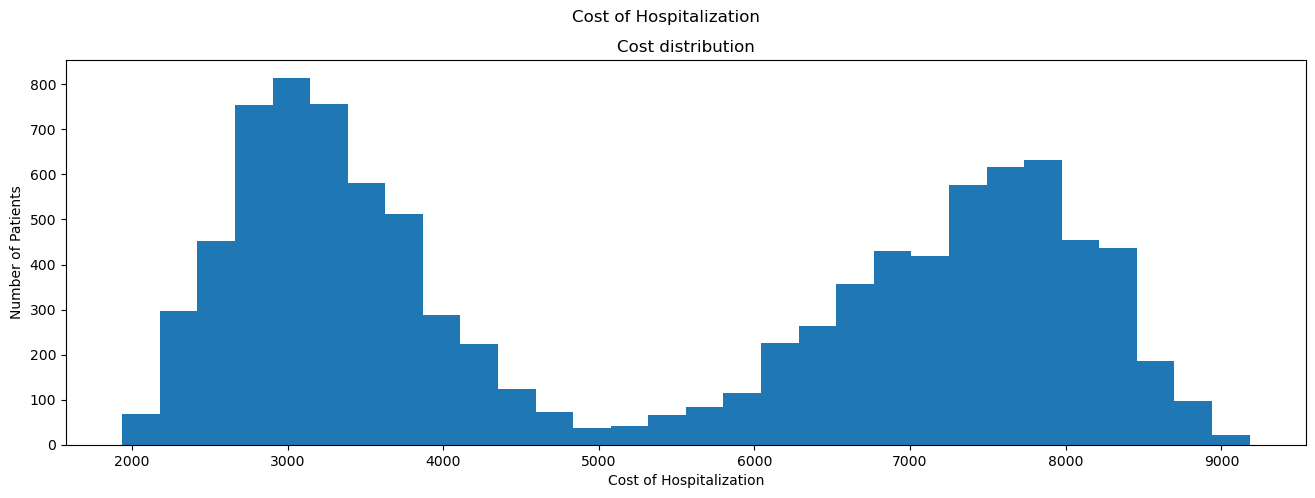

In [35]:
#Creating the chart for the dependent variable distribution
plt.figure(figsize=[16, 5])
plt.suptitle("Cost of Hospitalization")
plt.title("Cost distribution")
plt.hist(variables_df['total_charge'], bins=30)
plt.xlabel("Cost of Hospitalization")
plt.ylabel("Number of Patients")
plt.show()

We can see that the cost of hospitization has two peaks. One on the lower end and one on the higher end. This is an interesting results and for further study it might be worth seeing what variables affect each peak. 

Since the next set of plots are all going to the same code I am going to create a function to quickly create each of the charts. 

In [36]:
def quantitative_patient_data(variable_df, variable, suptitle, title_left, title_right, x_label, y_label):
    plt.figure(figsize=[16, 5])
    plt.suptitle(suptitle)

    # LEFT plot: Univariate exploration
    plt.subplot(1, 2, 1)
    plt.title(title_left)
    plt.hist(data=variable_df, x=variable, bins=10)
    plt.xlabel(f'{x_label} of Patient')
    plt.ylabel('Number of Patients')

    # RIGHT plot: Bivariate exploration 
    plt.subplot(1, 2, 2)
    plt.title(title_right)
    sb.regplot(data=variable_df, x=variable, y="total_charge", x_jitter=0.3, scatter_kws={'alpha': 1 / 10})
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.show()

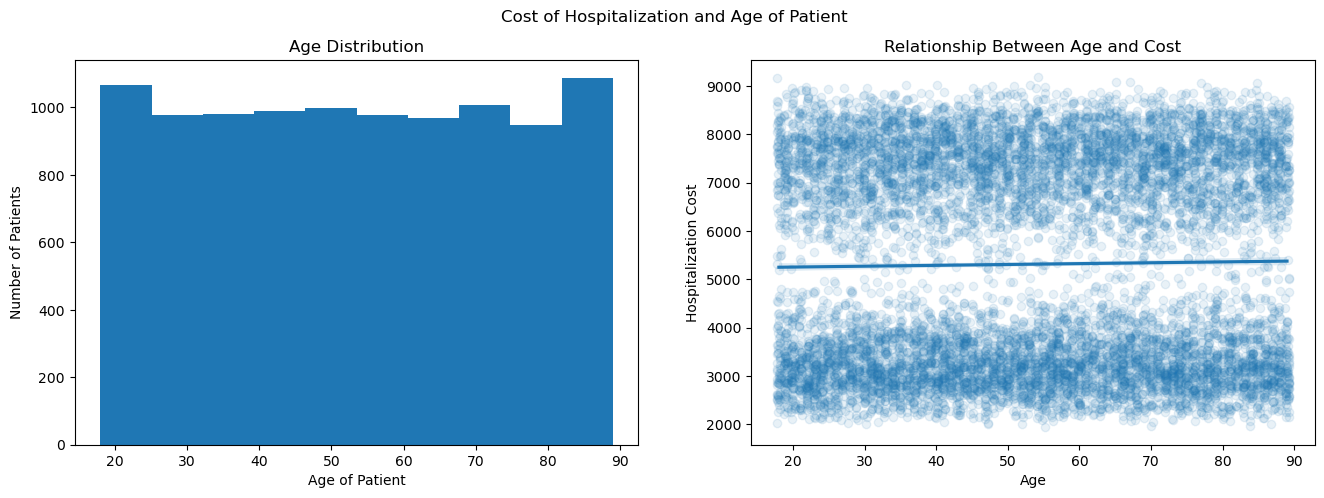

In [37]:
# The first variable is Age
quantitative_patient_data(
    variable_df=variables_df,
    variable='age',
    suptitle='Cost of Hospitalization and Age of Patient',
    title_left='Age Distribution',
    title_right='Relationship Between Age and Cost',
    x_label='Age',
    y_label='Hospitalization Cost'
)

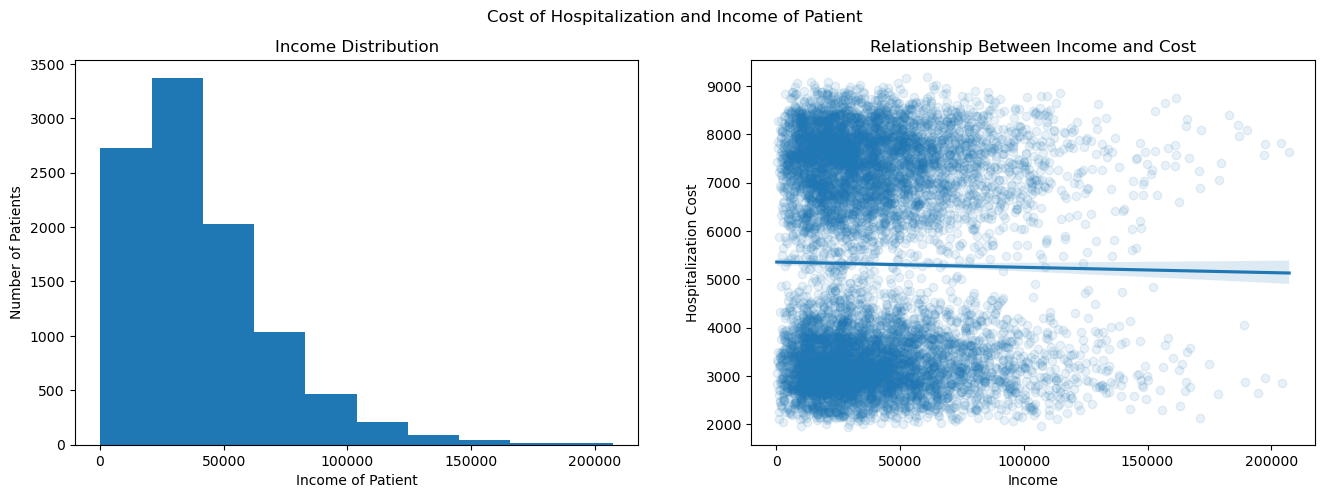

In [38]:
# Income
quantitative_patient_data(
    variable_df=variables_df,
    variable='income',
    suptitle='Cost of Hospitalization and Income of Patient',
    title_left='Income Distribution',
    title_right='Relationship Between Income and Cost',
    x_label='Income',
    y_label='Hospitalization Cost'
)

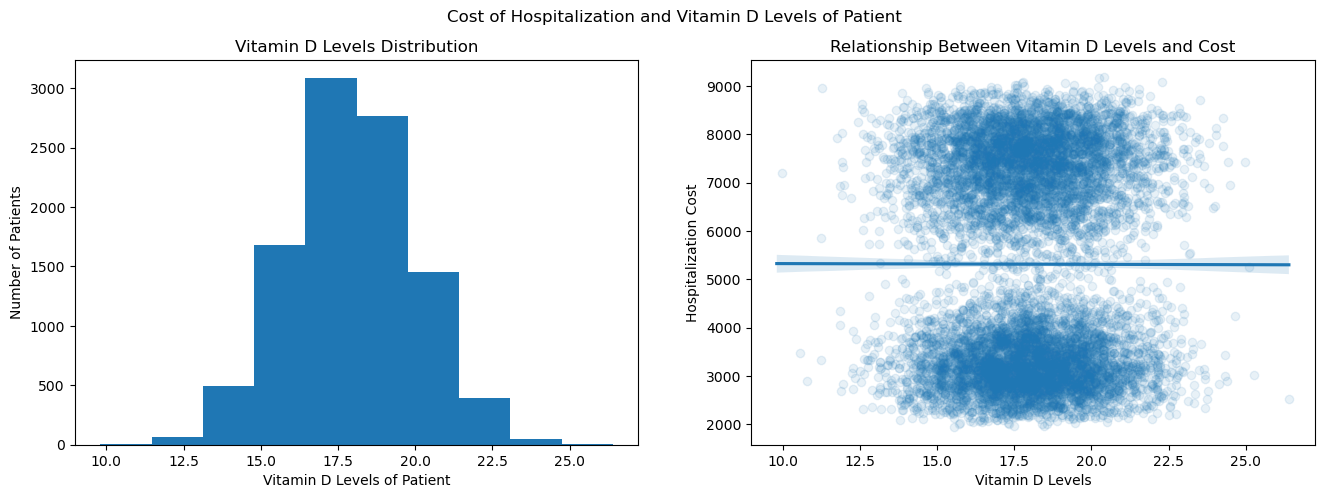

In [39]:
# Vitamin D Levels
quantitative_patient_data(
    variable_df=variables_df,
    variable='vit_d',
    suptitle='Cost of Hospitalization and Vitamin D Levels of Patient',
    title_left='Vitamin D Levels Distribution',
    title_right='Relationship Between Vitamin D Levels and Cost',
    x_label='Vitamin D Levels',
    y_label='Hospitalization Cost'
)

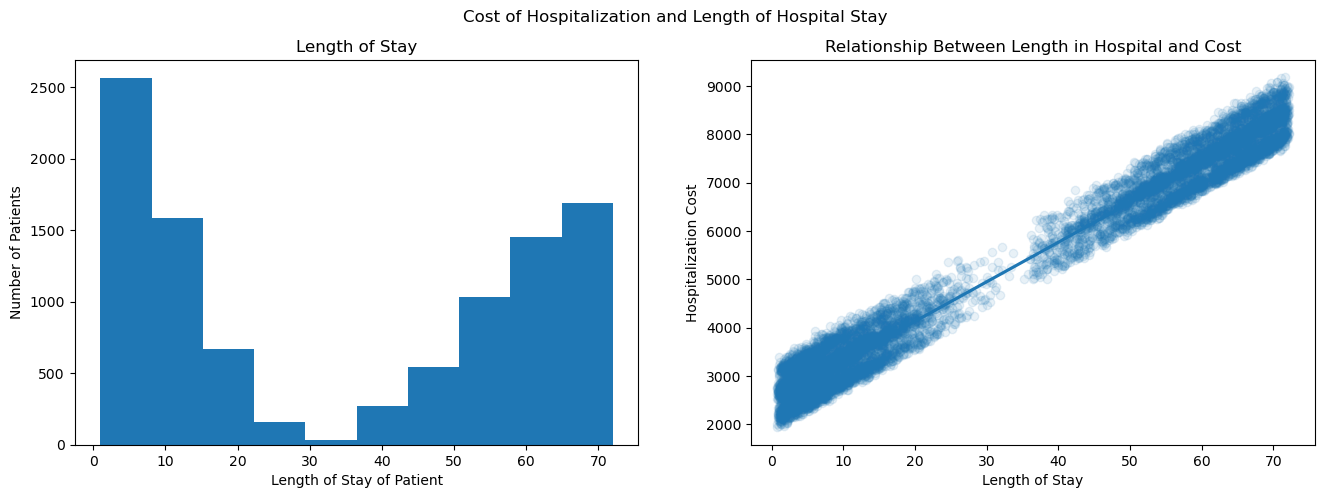

In [40]:
#Initial Days
quantitative_patient_data(
    variable_df=variables_df,
    variable='initial_days',
    suptitle='Cost of Hospitalization and Length of Hospital Stay',
    title_left='Length of Stay',
    title_right='Relationship Between Length in Hospital and Cost',
    x_label='Length of Stay',
    y_label='Hospitalization Cost'
)

In [41]:
# Creating a new function to create charts for the binary categorical variables. 
def qualitative_patient_data(variable_df, variable, suptitle, title_left, title_right, x_label, y_label):
    plt.figure(figsize=[16, 5])
    plt.suptitle(suptitle)

    # LEFT plot: Univariate exploration
    plt.subplot(1, 2, 1)
    plt.title(title_left)
    comp_risk_counts = variable_df[variable].value_counts()
    comp_risk_labels = [f'{variable}', f'no {variable}']
    plt.pie(comp_risk_counts, labels=comp_risk_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
    plt.axis('square')

    # RIGHT plot: Bivariate exploration
    plt.subplot(1, 2, 2)
    plt.title(title_right)
    sb.boxplot(data=variable_df, x=variable, y='total_charge', color="cyan")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.show()

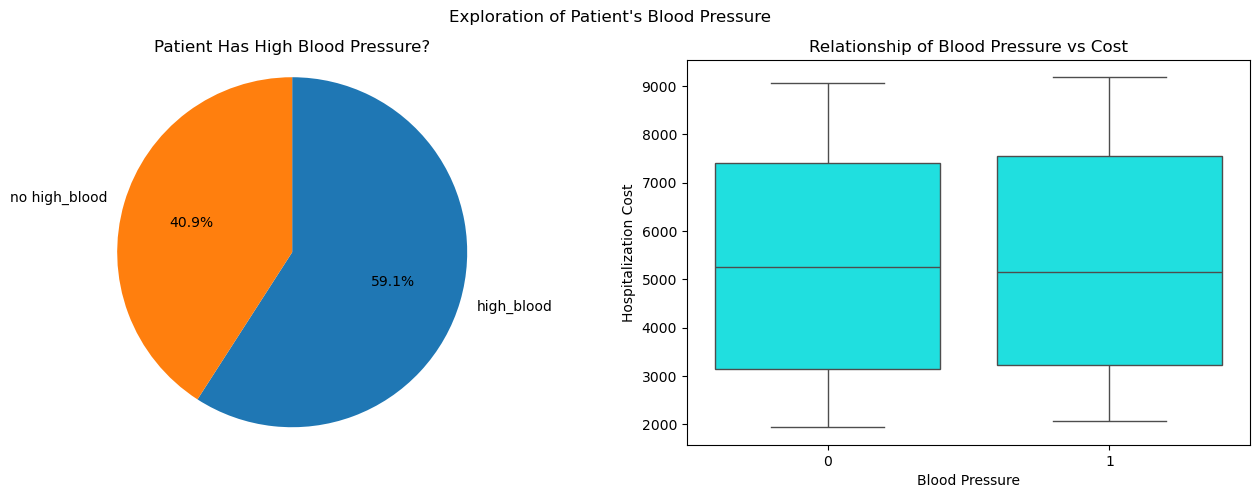

In [42]:
#High Blood Pressure
qualitative_patient_data(
    variable_df=variables_df,
    variable='high_blood',
    suptitle="Exploration of Patient's Blood Pressure",
    title_left="Patient Has High Blood Pressure?",
    title_right="Relationship of Blood Pressure vs Cost",
    x_label="Blood Pressure",
    y_label="Hospitalization Cost"
)

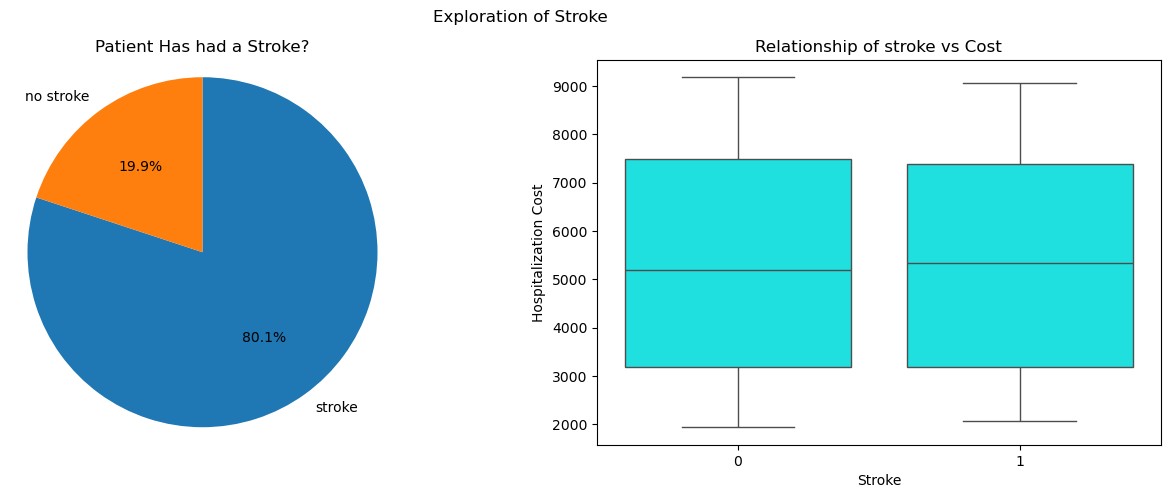

In [43]:
# Stroke
qualitative_patient_data(
    variable_df=variables_df,
    variable='stroke',
    suptitle="Exploration of Stroke",
    title_left="Patient Has had a Stroke?",
    title_right="Relationship of stroke vs Cost",
    x_label="Stroke",
    y_label="Hospitalization Cost"
)

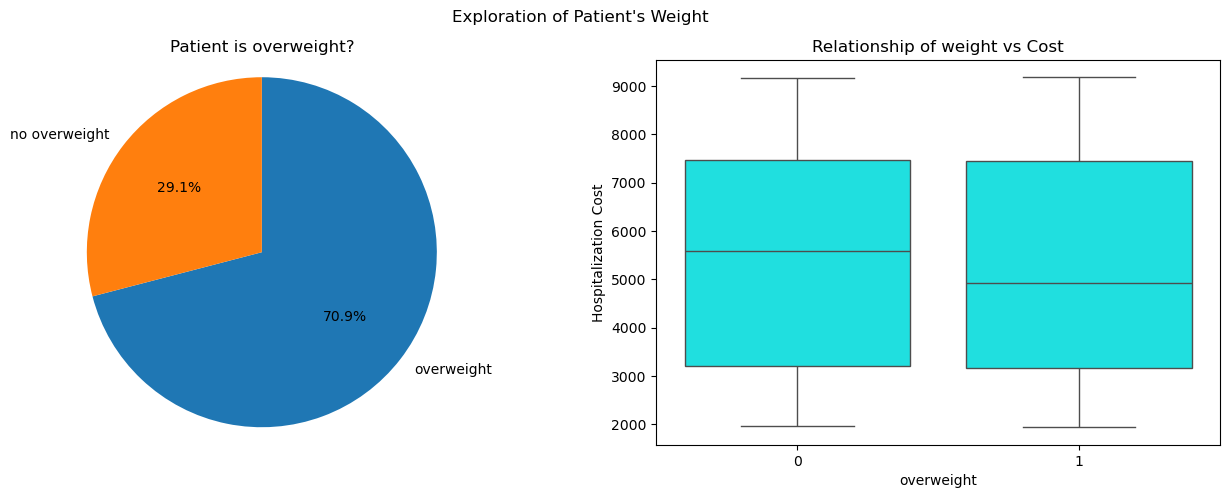

In [44]:
# Overweight
qualitative_patient_data(
    variable_df=variables_df,
    variable='overweight',
    suptitle="Exploration of Patient's Weight",
    title_left="Patient is overweight?",
    title_right="Relationship of weight vs Cost",
    x_label="overweight",
    y_label="Hospitalization Cost"
)

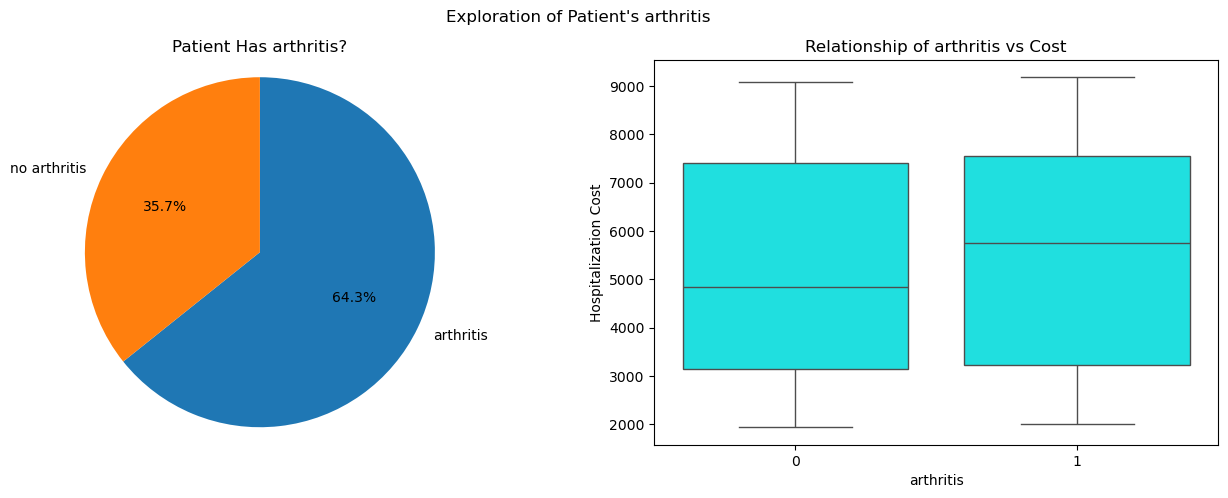

In [45]:
# Arthritis
qualitative_patient_data(
    variable_df=variables_df,
    variable='arthritis',
    suptitle="Exploration of Patient's arthritis",
    title_left="Patient Has arthritis?",
    title_right="Relationship of arthritis vs Cost",
    x_label="arthritis",
    y_label="Hospitalization Cost"
)

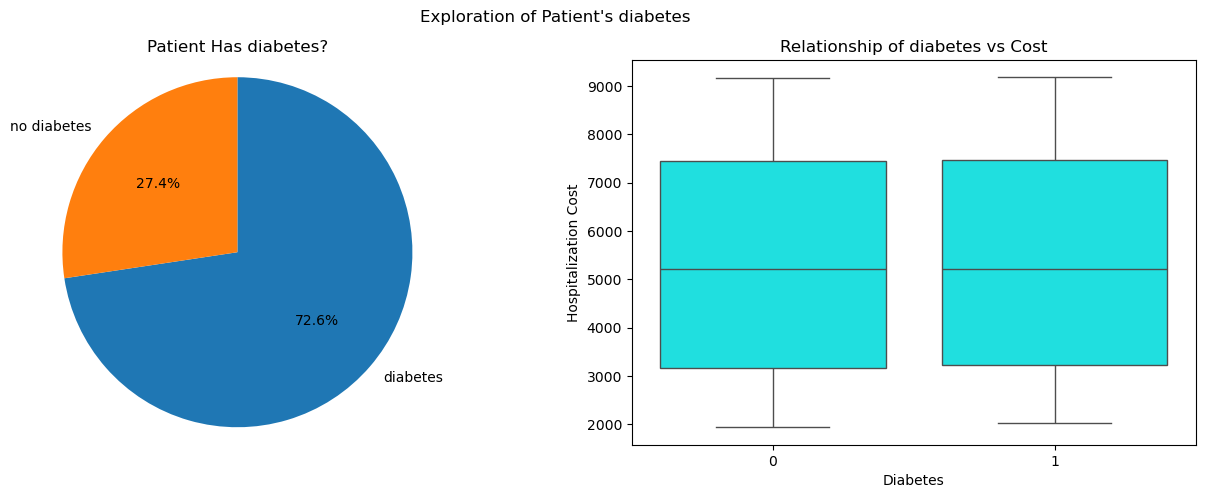

In [46]:
# Diabetes
qualitative_patient_data(
    variable_df=variables_df,
    variable='diabetes',
    suptitle="Exploration of Patient's diabetes",
    title_left="Patient Has diabetes?",
    title_right="Relationship of diabetes vs Cost",
    x_label="Diabetes",
    y_label="Hospitalization Cost"
)

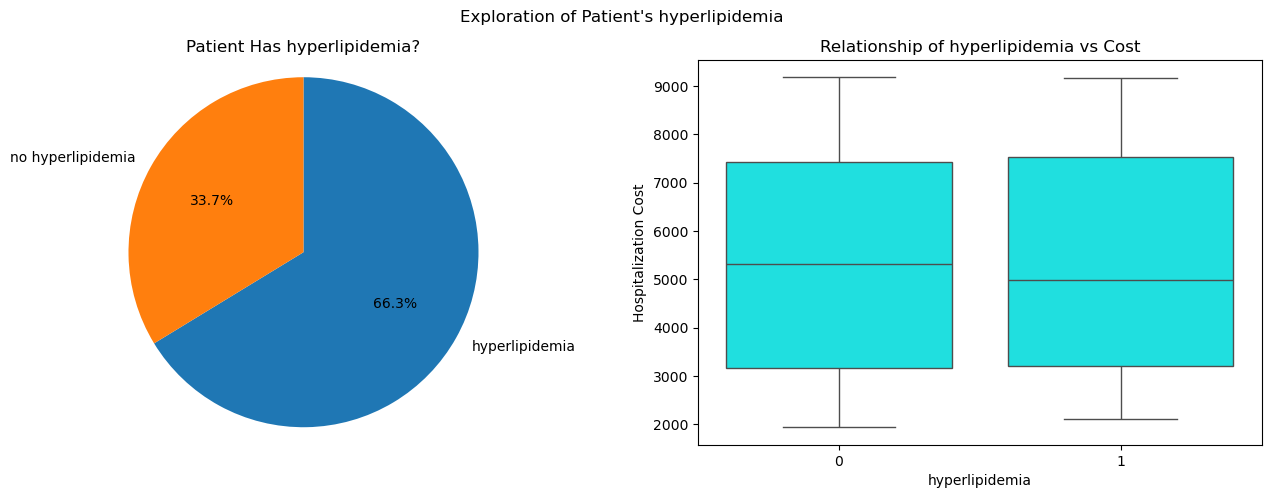

In [47]:
# Hyperlipidemia
qualitative_patient_data(
    variable_df=variables_df,
    variable='hyperlipidemia',
    suptitle="Exploration of Patient's hyperlipidemia",
    title_left="Patient Has hyperlipidemia?",
    title_right="Relationship of hyperlipidemia vs Cost",
    x_label="hyperlipidemia",
    y_label="Hospitalization Cost"
)

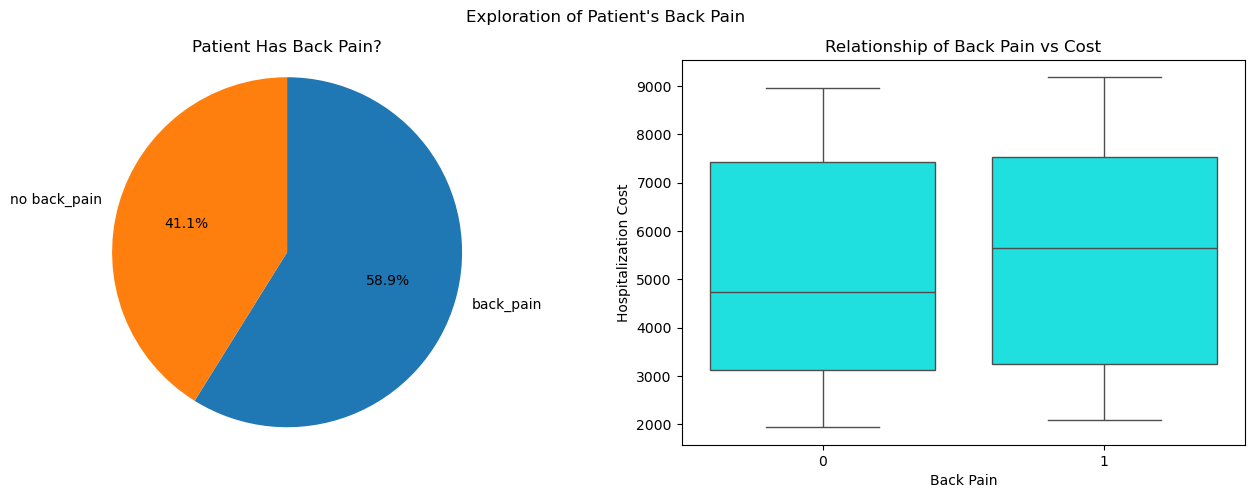

In [48]:
# Back Pain
qualitative_patient_data(
    variable_df=variables_df,
    variable='back_pain',
    suptitle="Exploration of Patient's Back Pain",
    title_left="Patient Has Back Pain?",
    title_right="Relationship of Back Pain vs Cost",
    x_label="Back Pain",
    y_label="Hospitalization Cost"
)

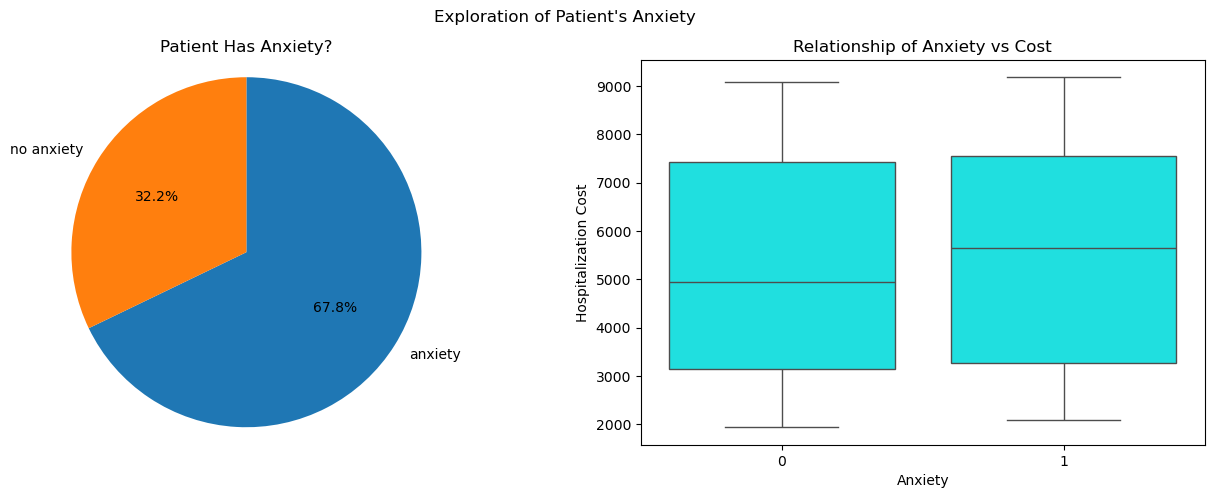

In [49]:
# Anxiety
qualitative_patient_data(
    variable_df=variables_df,
    variable='anxiety',
    suptitle="Exploration of Patient's Anxiety",
    title_left="Patient Has Anxiety?",
    title_right="Relationship of Anxiety vs Cost",
    x_label="Anxiety",
    y_label="Hospitalization Cost"
)

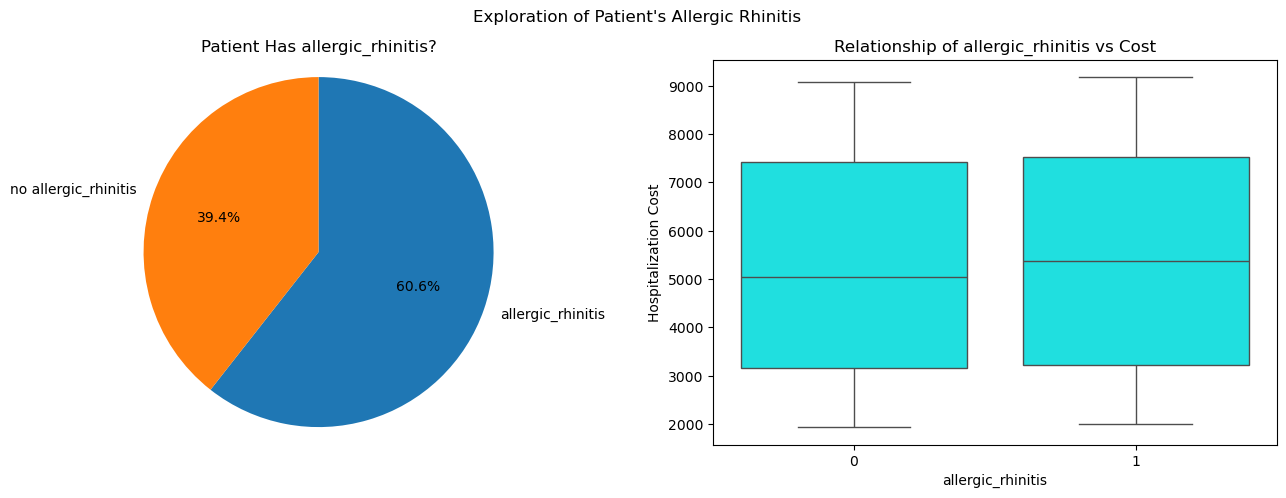

In [50]:
# Allergic Rhinitis
qualitative_patient_data(
    variable_df=variables_df,
    variable='allergic_rhinitis',
    suptitle="Exploration of Patient's Allergic Rhinitis",
    title_left="Patient Has allergic_rhinitis?",
    title_right="Relationship of allergic_rhinitis vs Cost",
    x_label="allergic_rhinitis",
    y_label="Hospitalization Cost"
)

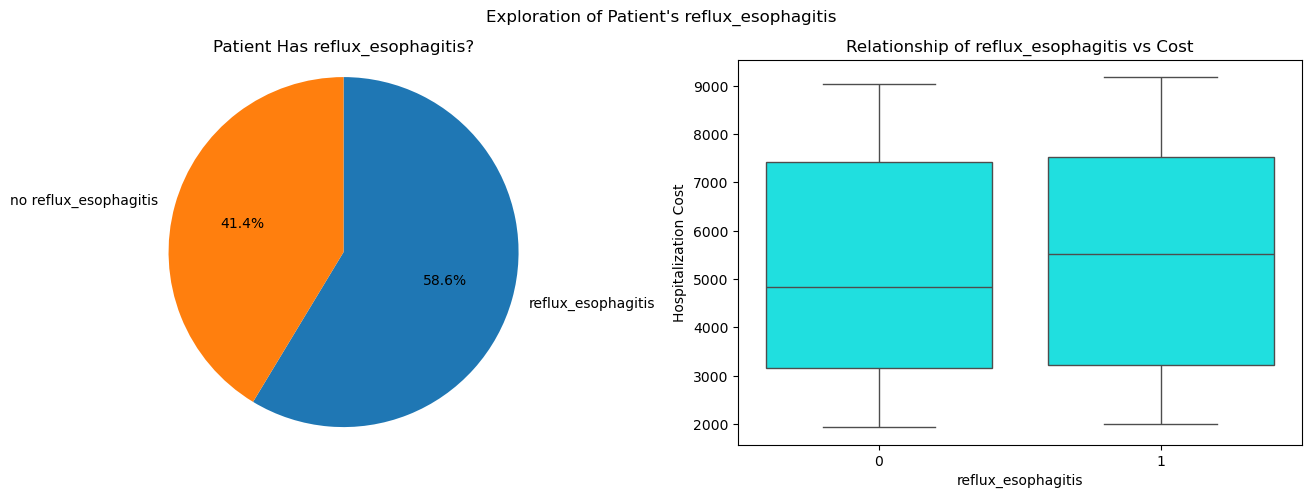

In [51]:
# Reflux Esophagitis
qualitative_patient_data(
    variable_df=variables_df,
    variable='reflux_esophagitis',
    suptitle="Exploration of Patient's reflux_esophagitis",
    title_left="Patient Has reflux_esophagitis?",
    title_right="Relationship of reflux_esophagitis vs Cost",
    x_label="reflux_esophagitis",
    y_label="Hospitalization Cost"
)

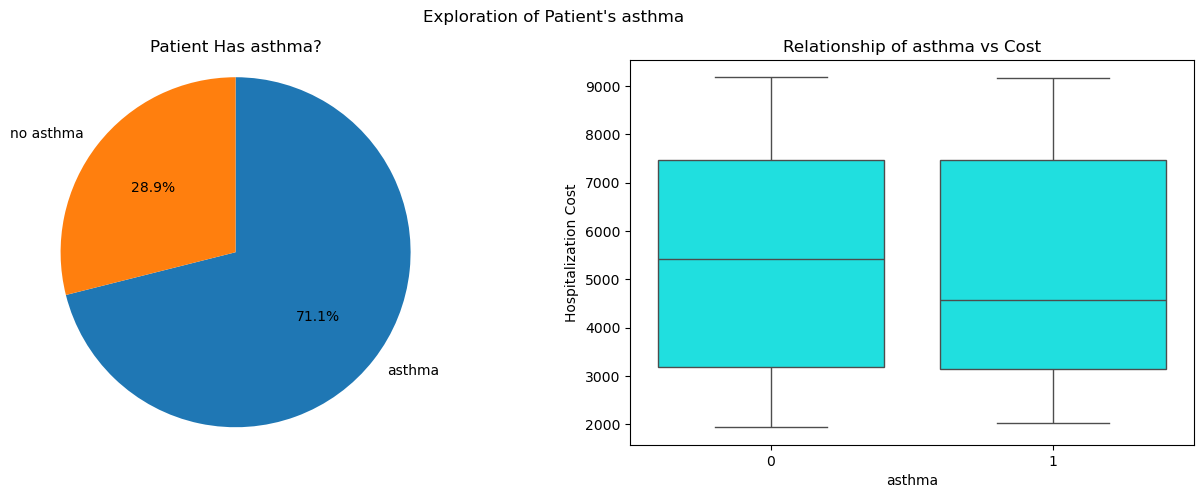

In [52]:
# Asthma
qualitative_patient_data(
    variable_df=variables_df,
    variable='asthma',
    suptitle="Exploration of Patient's asthma",
    title_left="Patient Has asthma?",
    title_right="Relationship of asthma vs Cost",
    x_label="asthma",
    y_label="Hospitalization Cost"
)

In [53]:
# Function for the rest of the categorical variables
def plot_categorical_variable(variable_df, variable, suptitle, title_left, title_right, x_label, y_label):
    plt.figure(figsize=[16, 5])
    plt.suptitle(suptitle)

    # LEFT plot: Univariate exploration
    plt.subplot(1, 2, 1)
    plt.title(title_left)
    sb.countplot(data=variable_df, x=variable)
    plt.xlabel(x_label)
    plt.ylabel('Number of Patients')

    # RIGHT plot: Bivariate exploration
    plt.subplot(1, 2, 2)
    plt.title(title_right)
    sb.boxplot(data=variable_df, x=variable, y='total_charge', color="cyan")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.show()

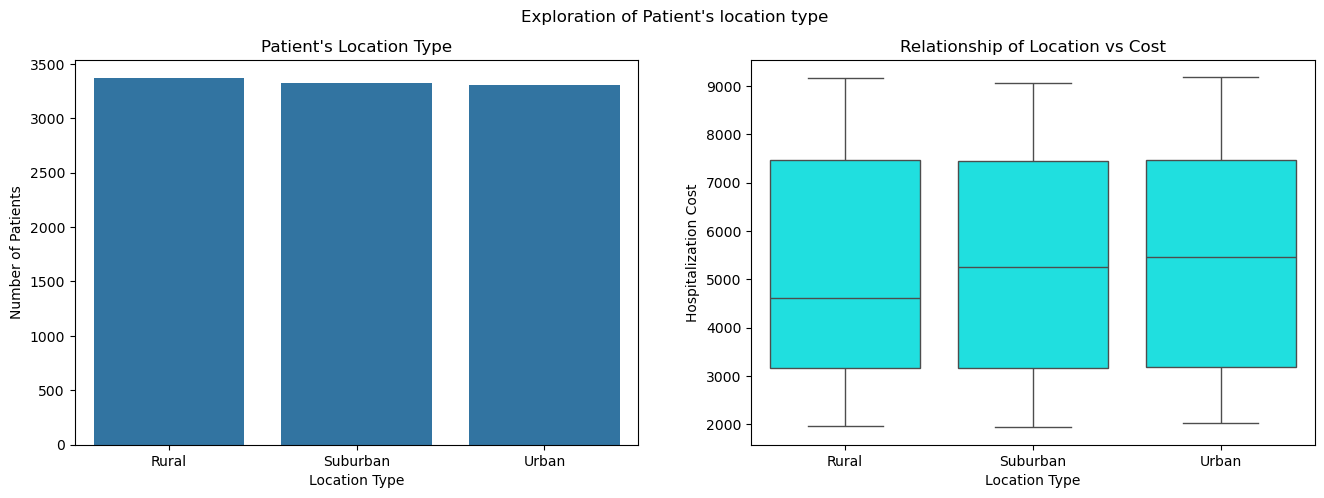

In [54]:
# Location Type
plot_categorical_variable(
    variable_df=variables_df,
    variable='area',
    suptitle="Exploration of Patient's location type",
    title_left="Patient's Location Type",
    title_right="Relationship of Location vs Cost",
    x_label="Location Type",
    y_label="Hospitalization Cost"
)

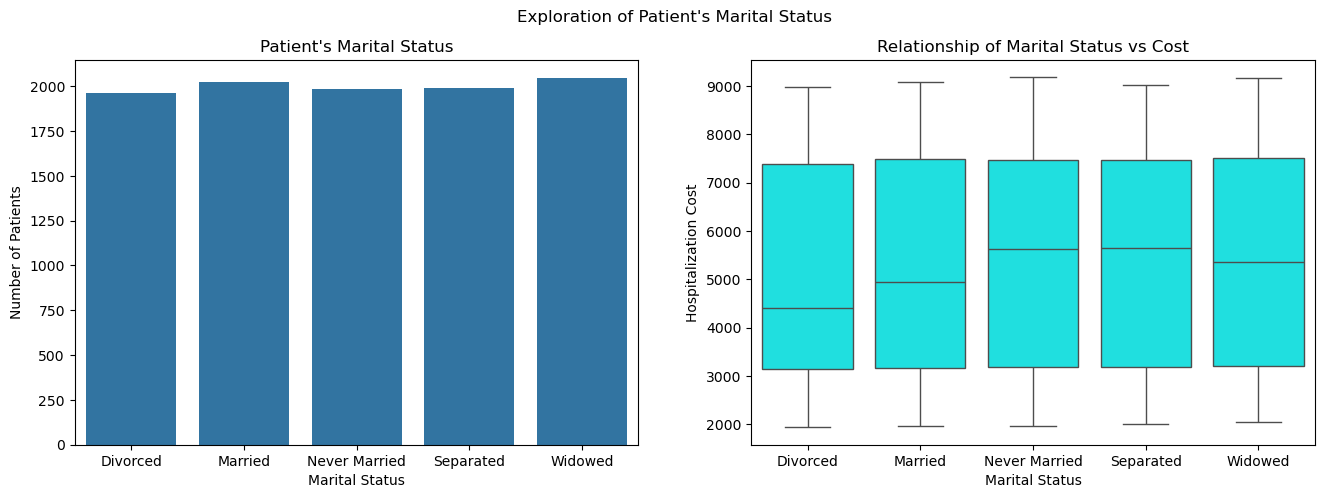

In [55]:
# Marital Status
plot_categorical_variable(
    variable_df=variables_df,
    variable='marital',
    suptitle="Exploration of Patient's Marital Status",
    title_left="Patient's Marital Status",
    title_right="Relationship of Marital Status vs Cost",
    x_label="Marital Status",
    y_label="Hospitalization Cost"
)

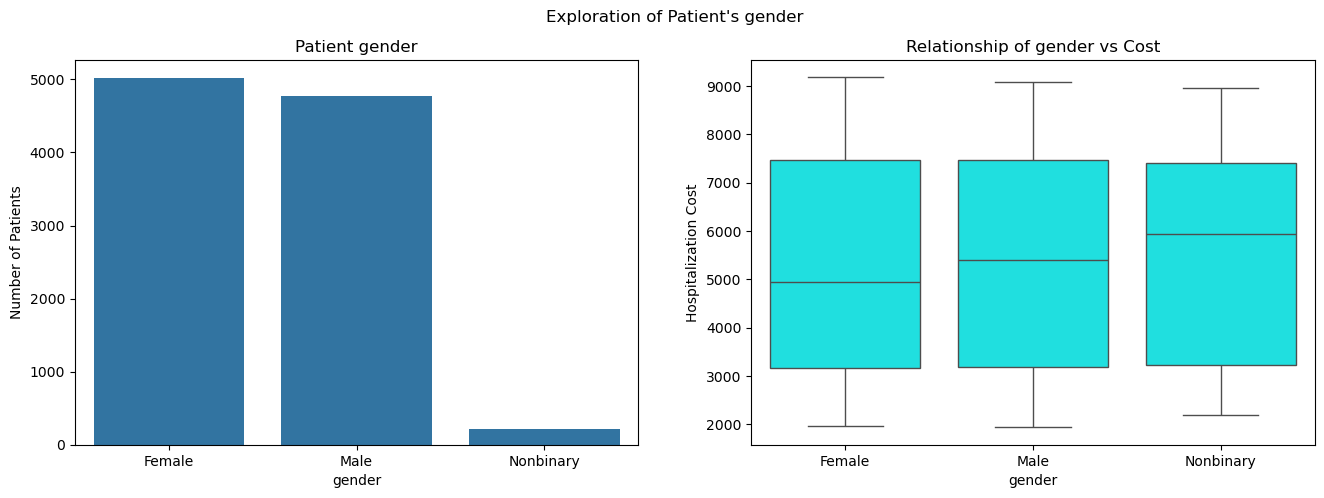

In [56]:
# Gender
plot_categorical_variable(
    variable_df=variables_df,
    variable='gender',
    suptitle="Exploration of Patient's gender",
    title_left="Patient gender",
    title_right="Relationship of gender vs Cost",
    x_label="gender",
    y_label="Hospitalization Cost"
)

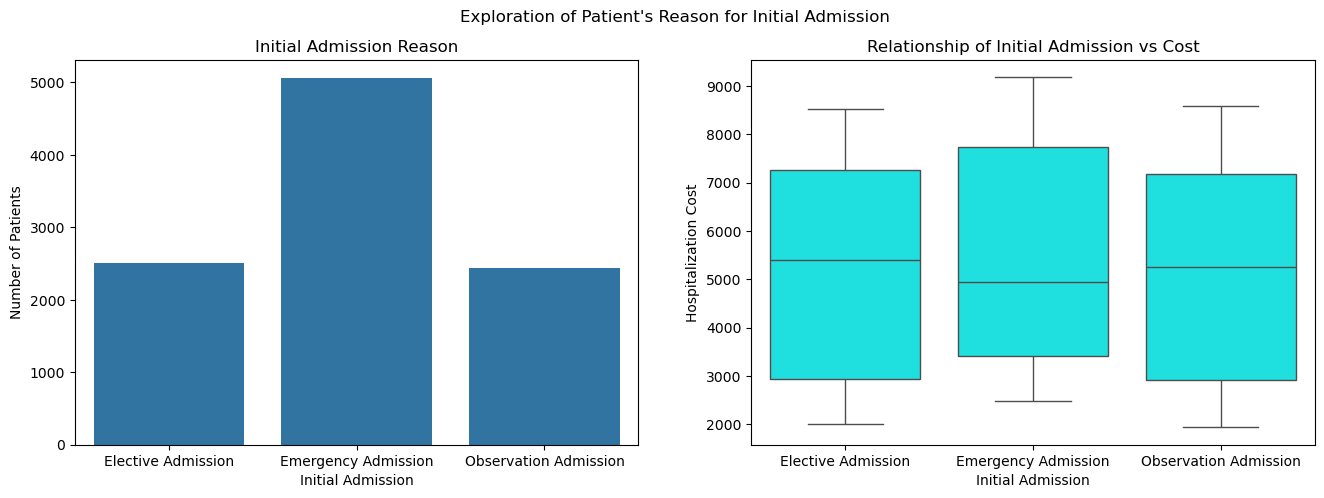

In [57]:
# Reason for Initial admission
plot_categorical_variable(
    variable_df=variables_df,
    variable='initial_admin',
    suptitle="Exploration of Patient's Reason for Initial Admission",
    title_left="Initial Admission Reason",
    title_right="Relationship of Initial Admission vs Cost",
    x_label="Initial Admission",
    y_label="Hospitalization Cost"
)

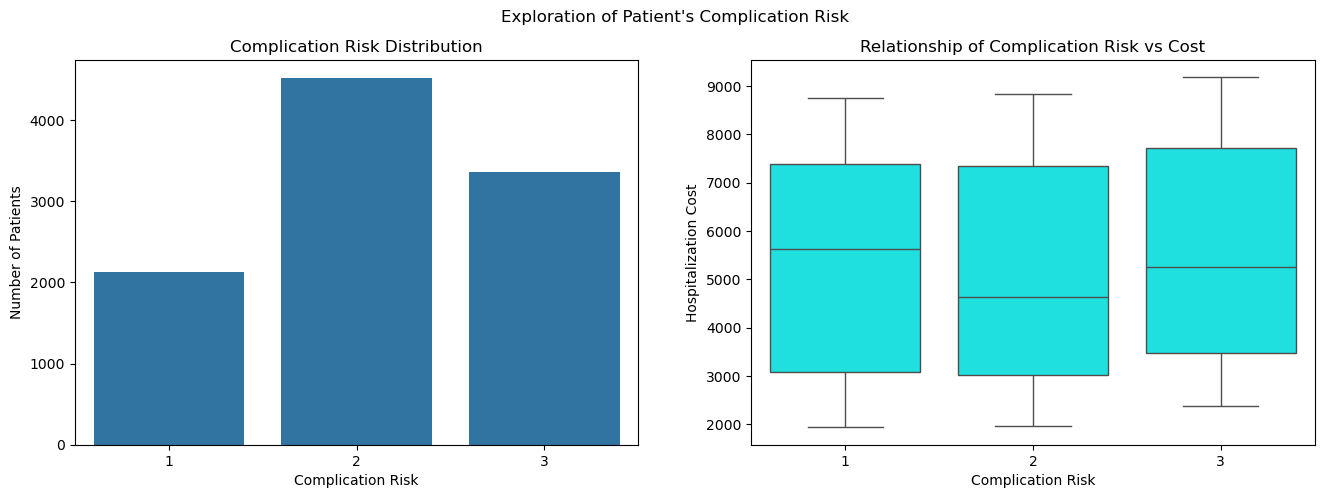

In [58]:
# Complication Risk
plot_categorical_variable(
    variable_df=variables_df,
    variable='complication_risk',
    suptitle="Exploration of Patient's Complication Risk",
    title_left="Complication Risk Distribution",
    title_right="Relationship of Complication Risk vs Cost",
    x_label="Complication Risk",
    y_label="Hospitalization Cost"
)

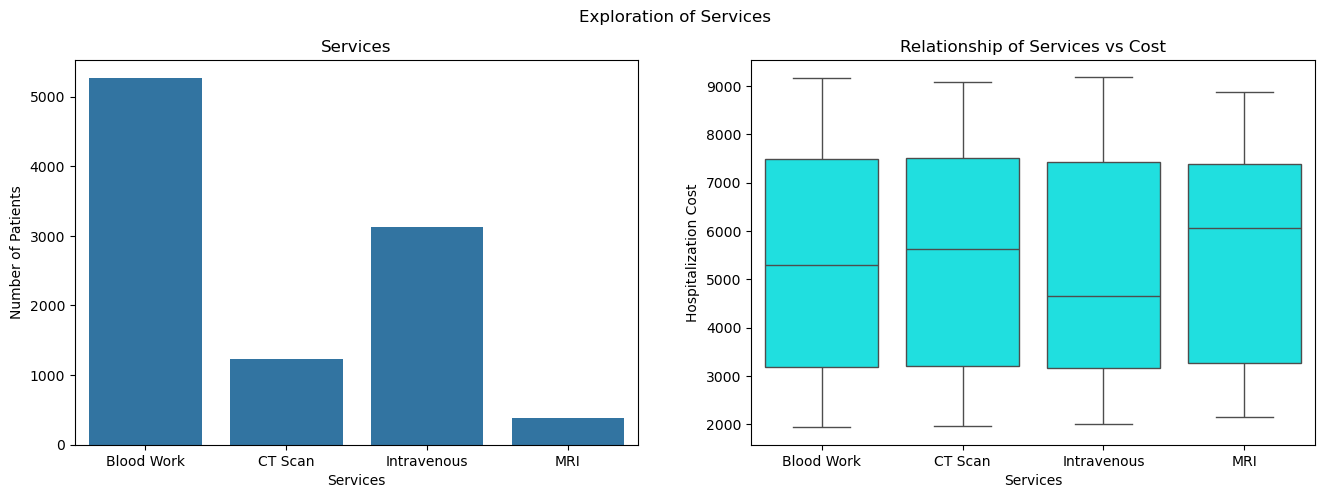

In [59]:
# Services used in Hospital
plot_categorical_variable(
    variable_df=variables_df,
    variable='services',
    suptitle="Exploration of Services",
    title_left="Services",
    title_right="Relationship of Services vs Cost",
    x_label="Services",
    y_label="Hospitalization Cost"
)

### C4. Data Transformation

In order to use the categorical variables in the regression model we have to transform the data to be numeric. To do this I will be using one hot encoding. This will create dummy columns filled with 1's and 0's to indicate the presence or absence of data for the patient. One Hot encoding always creates dummy variables that are 1 less than the values in the column. Therefore we will see 2 columns for the area column and a row with 0's in both will indicate that the area is the column that was dropped. 

In [60]:
# One Hot encoding for nominal categorical variables
categorical_columns = ['area', 'marital', 'gender', 'initial_admin', 'services']
multi_linear_regress = pd.get_dummies(variables_df, columns=categorical_columns, drop_first=True)

# Convert any Boolean columns to 1/0 binary values
multi_linear_regress = multi_linear_regress.astype(int)

In [61]:
# Clean up the names of the new columns
pythonic_columns = ['age', 'income', 'vit_d', 'high_blood', 'stroke', 'complication_risk','overweight', 'arthritis', 
                    'diabetes', 'hyperlipidemia', 'back_pain', 'anxiety', 'allergic_rhinitis', 'reflux_esophagitis', 
                    'asthma', 'initial_days', 'total_charge','area_suburban', 'area_urban', 'marital_married', 
                    'marital_never', 'marital_seperate', 'marital_widow', 'gender_male', 'gender_nb', 
                    'initial_admin_emergency', 'initial_admin_observation','services_ct', 'services_iv', 
                    'services_mri']
multi_linear_regress = multi_linear_regress.set_axis(pythonic_columns, axis=1)
multi_linear_regress.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        10000 non-null  int32
 1   income                     10000 non-null  int32
 2   vit_d                      10000 non-null  int32
 3   high_blood                 10000 non-null  int32
 4   stroke                     10000 non-null  int32
 5   complication_risk          10000 non-null  int32
 6   overweight                 10000 non-null  int32
 7   arthritis                  10000 non-null  int32
 8   diabetes                   10000 non-null  int32
 9   hyperlipidemia             10000 non-null  int32
 10  back_pain                  10000 non-null  int32
 11  anxiety                    10000 non-null  int32
 12  allergic_rhinitis          10000 non-null  int32
 13  reflux_esophagitis         10000 non-null  int32
 14  asthma                     

### C5. Prepared dataset

In [62]:
# Save dataframe to CSV
multi_linear_regress.to_csv('d209_task_1.csv', index=False)

## Part 4. Model Comparison and Analysis
### D1. Initial Model

My initial model for the data will use all the variables that I explored above. Which I will then reduce to create an even better model. 

The code for this model was created with help from the D208 Datacamp courses.

In [63]:
# Initial model for Multiple Linear Regression

# Set dependent variable
y = multi_linear_regress.total_charge
# Set multiple independent variables
X = multi_linear_regress[['age', 'income', 'vit_d', 'high_blood', 'stroke', 'complication_risk', 'overweight','arthritis','diabetes',
                'hyperlipidemia','back_pain','anxiety','allergic_rhinitis','reflux_esophagitis','asthma','initial_days',
                'area_suburban','area_urban','marital_married','marital_never','marital_seperate',
                'marital_widow','gender_male','gender_nb','initial_admin_emergency','initial_admin_observation','services_ct',
                'services_iv','services_mri']].assign(const=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_charge   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.490e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:19:05   Log-Likelihood:                -60690.
No. Observations:               10000   AIC:                         1.214e+05
Df Residuals:                    9970   BIC:                         1.217e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
age                   

### D2. Model Reduction and Justification

We can see that the initial model warns of strong multicollinearity which is one of the assumptions that the data must pass in order to create a good model. 

The first step for correcting this is to use variance inflation factor (VIF). This method checks to see which variables are causing the multicollinearity. Any VIF greater than 10 shows that the variable is interacting with the other independent variables and causing issues. 

The code for the VIF test was created with help from the D208 webinar slideshows.

In [64]:
# check for VIF to see if variables should be eliminated due to high multicolinearity
X = multi_linear_regress[['age', 'income', 'vit_d', 'high_blood', 'stroke', 'complication_risk', 'overweight', 
                          'arthritis','diabetes', 'hyperlipidemia','back_pain','anxiety','allergic_rhinitis', 
                          'reflux_esophagitis','asthma','initial_days', 'area_suburban','area_urban', 
                          'marital_married','marital_never','marital_seperate', 'marital_widow','gender_male', 
                          'gender_nb','initial_admin_emergency','initial_admin_observation','services_ct', 
                          'services_iv','services_mri']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                      feature        VIF
0                         age   7.315883
1                      income  -0.000049
2                       vit_d  25.882305
3                  high_blood   1.691272
4                      stroke   1.248830
5           complication_risk   8.750329
6                  overweight   3.380102
7                   arthritis   1.555555
8                    diabetes   1.372262
9              hyperlipidemia   1.504654
10                  back_pain   1.697498
11                    anxiety   1.473018
12          allergic_rhinitis   1.642685
13         reflux_esophagitis   1.695361
14                     asthma   1.406434
15               initial_days   2.636585
16              area_suburban   1.971290
17                 area_urban   1.975209
18            marital_married   1.996920
19              marital_never   1.969614
20           marital_seperate   1.967339
21              marital_widow   2.002541
22                gender_male   1.929871
23              

The Vitamin D levels column has a high colinearity which is causing the multicolinearity warning. So I will remove vit_d and run the VIF test again.

In [65]:
# check for VIF to see if variables should be eliminated due to high multicolinearity
X = multi_linear_regress[['age', 'income', 'high_blood', 'stroke', 'complication_risk', 'overweight','arthritis','diabetes',
                'hyperlipidemia','back_pain','anxiety','allergic_rhinitis','reflux_esophagitis','asthma','initial_days',
                'area_suburban','area_urban','marital_married','marital_never','marital_seperate',
                'marital_widow','gender_male','gender_nb','initial_admin_emergency','initial_admin_observation','services_ct',
                'services_iv','services_mri']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                      feature       VIF
0                         age  6.417232
1                      income -0.000047
2                  high_blood  1.677277
3                      stroke  1.241941
4           complication_risk  7.335857
5                  overweight  3.224179
6                   arthritis  1.543178
7                    diabetes  1.364565
8              hyperlipidemia  1.494998
9                   back_pain  1.683031
10                    anxiety  1.461934
11          allergic_rhinitis  1.625907
12         reflux_esophagitis  1.675752
13                     asthma  1.396719
14               initial_days  2.568096
15              area_suburban  1.921810
16                 area_urban  1.916891
17            marital_married  1.918884
18              marital_never  1.886671
19           marital_seperate  1.878163
20              marital_widow  1.920322
21                gender_male  1.895471
22                  gender_nb  1.044165
23    initial_admin_emergency  2.789904


With Vit_d gone all of the VIF numbers are below the threshold for colinearity so I will run the model again to see what happens. 

In [66]:
# Set dependent variable
y = multi_linear_regress.total_charge
# Set multiple independent variables
X = multi_linear_regress[['age', 'income', 'high_blood', 'stroke', 'complication_risk', 'overweight','arthritis','diabetes',
                'hyperlipidemia','back_pain','anxiety','allergic_rhinitis','reflux_esophagitis','asthma','initial_days',
                'area_suburban','area_urban','marital_married','marital_never','marital_seperate',
                'marital_widow','gender_male','gender_nb','initial_admin_emergency','initial_admin_observation','services_ct',
                'services_iv','services_mri']].assign(const=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_charge   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.544e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:19:07   Log-Likelihood:                -60690.
No. Observations:               10000   AIC:                         1.214e+05
Df Residuals:                    9971   BIC:                         1.216e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
age                   

Since I am still getting notes about a large condition number but the VIF isn't showing any more large colinearity, I am going to do a process of standardizing the numerical data. Since the variables use different scales of measurement it can be hard to compare the independent variables. To standardize the variables I will be using the standard scaler function which will essentially make all the variables 0-1, making the mean of the dataset 0 and the standard deviation 1. [Standardization in Python](https://www.askpython.com/python/examples/standardize-data-in-python)

In [67]:
# Separate the independent and dependent variables
X_data = multi_linear_regress[['age', 'income', 'high_blood', 'stroke', 'complication_risk', 'overweight','arthritis','diabetes',
                'hyperlipidemia','back_pain','anxiety','allergic_rhinitis','reflux_esophagitis','asthma','initial_days',
                'area_suburban','area_urban','marital_married','marital_never','marital_seperate',
                'marital_widow','gender_male','gender_nb','initial_admin_emergency','initial_admin_observation','services_ct',
                'services_iv','services_mri']]
target = multi_linear_regress.total_charge

# Standardization of independent variables with column names retained
scaler = StandardScaler()
standardized_X = scaler.fit_transform(X_data)

# Create a DataFrame with standardized values and original column names
standardized_df = pd.DataFrame(standardized_X, columns=X_data.columns)

# Add the dependent variable to the standardized DataFrame
standardized_df['total_charge'] = target.values

print(standardized_df)

           age    income  high_blood    stroke  complication_risk  overweight  \
0    -0.024795  1.615899    1.202076 -0.498906          -0.168873   -1.562420   
1    -0.121706  0.221426    1.202076 -0.498906           1.200737    0.640033   
2    -0.024795 -0.915857    1.202076 -0.498906          -0.168873    0.640033   
3     1.186592 -0.026263   -0.831894  2.004386          -0.168873   -1.562420   
4    -1.526914 -1.377327   -0.831894 -0.498906          -1.538483   -1.562420   
...        ...       ...         ...       ...                ...         ...   
9995 -1.381548  0.192042    1.202076 -0.498906          -0.168873   -1.562420   
9996  1.622691 -0.894363    1.202076 -0.498906          -0.168873    0.640033   
9997 -0.412438  0.891558    1.202076 -0.498906           1.200737    0.640033   
9998 -0.509349 -0.378265   -0.831894 -0.498906          -0.168873    0.640033   
9999  0.798948  0.778128   -0.831894 -0.498906          -1.538483    0.640033   

      arthritis  diabetes  

With the variables standardized I will reduce the model further by removing variables that aren't statistically significant. This method, from D208 coursework, involves removing variables with a p value greater than 0.05. A p values higher than the 0.05 threshold indicates that the variable is not statistically significant, in other words the variable does not influence the dependent variable enough to matter. Taking out the variables that we know are not significant will simplify the model.

I will run the model, remove a non-significant variable, then run the model again and repeat until all of the variables that are left are within the threshold of significance. 

In [68]:
# Initial model with all variables
y = standardized_df.total_charge
X = standardized_df[['age', 'income', 'high_blood', 'stroke', 'complication_risk', 'overweight', 'arthritis', 'diabetes',
                     'hyperlipidemia', 'back_pain', 'anxiety', 'allergic_rhinitis', 'reflux_esophagitis', 'asthma',
                     'initial_days', 'area_suburban', 'area_urban', 'marital_married', 'marital_never', 'marital_seperate',
                     'marital_widow', 'gender_male', 'gender_nb', 'initial_admin_emergency', 'initial_admin_observation',
                     'services_ct', 'services_iv', 'services_mri']].assign(const=1)

model = sm.OLS(y, X)
results = model.fit()

# Display initial model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_charge   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.544e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:19:07   Log-Likelihood:                -60690.
No. Observations:               10000   AIC:                         1.214e+05
Df Residuals:                    9971   BIC:                         1.216e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
age                   

In [69]:
# Backwards elimination
# Remove Highest P-Value Gender_nb with 1.00

# Identify the predictor with the highest p-value
max_p_value = results.pvalues.idxmax()
max_p_value_value = results.pvalues.max()

# Remove the predictor with the highest p-value
X = X.drop(max_p_value, axis=1)

# Fit the updated model
model = sm.OLS(y, X)
results = model.fit()

# Display updated model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_charge   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.601e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:19:07   Log-Likelihood:                -60690.
No. Observations:               10000   AIC:                         1.214e+05
Df Residuals:                    9972   BIC:                         1.216e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
age                   

In [70]:
# Backwards elimination
# Remove Highest P-Value stroke with 0.891

# Identify the predictor with the highest p-value
max_p_value = results.pvalues.idxmax()
max_p_value_value = results.pvalues.max()

# Remove the predictor with the highest p-value
X = X.drop(max_p_value, axis=1)

# Fit the updated model
model = sm.OLS(y, X)
results = model.fit()

# Display updated model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_charge   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.663e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:19:07   Log-Likelihood:                -60690.
No. Observations:               10000   AIC:                         1.214e+05
Df Residuals:                    9973   BIC:                         1.216e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
age                   

In [71]:
# Backwards elimination
# Remove Highest P-Value services_iv with .786

# Identify the predictor with the highest p-value
max_p_value = results.pvalues.idxmax()
max_p_value_value = results.pvalues.max()

# Remove the predictor with the highest p-value
X = X.drop(max_p_value, axis=1)

# Fit the updated model
model = sm.OLS(y, X)
results = model.fit()

# Display updated model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_charge   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.730e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:19:07   Log-Likelihood:                -60690.
No. Observations:               10000   AIC:                         1.214e+05
Df Residuals:                    9974   BIC:                         1.216e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
age                   

In [72]:
# Backwards elimination
# Remove Highest P-Value area_urban with .767

# Identify the predictor with the highest p-value
max_p_value = results.pvalues.idxmax()
max_p_value_value = results.pvalues.max()

# Remove the predictor with the highest p-value
X = X.drop(max_p_value, axis=1)

# Fit the updated model
model = sm.OLS(y, X)
results = model.fit()

# Display updated model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_charge   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.802e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:19:07   Log-Likelihood:                -60690.
No. Observations:               10000   AIC:                         1.214e+05
Df Residuals:                    9975   BIC:                         1.216e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
age                   

In [73]:
# Backwards elimination
# Remove Highest P-Value marital_widow with .747

# Identify the predictor with the highest p-value
max_p_value = results.pvalues.idxmax()
max_p_value_value = results.pvalues.max()

# Remove the predictor with the highest p-value
X = X.drop(max_p_value, axis=1)

# Fit the updated model
model = sm.OLS(y, X)
results = model.fit()

# Display updated model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_charge   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.880e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:19:07   Log-Likelihood:                -60690.
No. Observations:               10000   AIC:                         1.214e+05
Df Residuals:                    9976   BIC:                         1.216e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
age                   

In [74]:
# Backwards elimination
# Remove Highest P-Value marital_never with .818

# Identify the predictor with the highest p-value
max_p_value = results.pvalues.idxmax()
max_p_value_value = results.pvalues.max()

# Remove the predictor with the highest p-value
X = X.drop(max_p_value, axis=1)

# Fit the updated model
model = sm.OLS(y, X)
results = model.fit()

# Display updated model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_charge   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.966e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:19:07   Log-Likelihood:                -60690.
No. Observations:               10000   AIC:                         1.214e+05
Df Residuals:                    9977   BIC:                         1.216e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
age                   

In [75]:
# Backwards elimination
# Remove Highest P-Value marital_seperate with .630

# Identify the predictor with the highest p-value
max_p_value = results.pvalues.idxmax()
max_p_value_value = results.pvalues.max()

# Remove the predictor with the highest p-value
X = X.drop(max_p_value, axis=1)

# Fit the updated model
model = sm.OLS(y, X)
results = model.fit()

# Display updated model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_charge   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.060e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:19:07   Log-Likelihood:                -60691.
No. Observations:               10000   AIC:                         1.214e+05
Df Residuals:                    9978   BIC:                         1.216e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
income                

In [76]:
# Backwards elimination
# Remove Highest P-Value age with .588

# Identify the predictor with the highest p-value
max_p_value = results.pvalues.idxmax()
max_p_value_value = results.pvalues.max()

# Remove the predictor with the highest p-value
X = X.drop(max_p_value, axis=1)

# Fit the updated model
model = sm.OLS(y, X)
results = model.fit()

# Display updated model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_charge   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.163e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:19:07   Log-Likelihood:                -60691.
No. Observations:               10000   AIC:                         1.214e+05
Df Residuals:                    9979   BIC:                         1.216e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
income                

In [77]:
# Backwards elimination
# Remove Highest P-Value asthma with .578

# Identify the predictor with the highest p-value
max_p_value = results.pvalues.idxmax()
max_p_value_value = results.pvalues.max()

# Remove the predictor with the highest p-value
X = X.drop(max_p_value, axis=1)

# Fit the updated model
model = sm.OLS(y, X)
results = model.fit()

# Display updated model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_charge   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.277e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:19:07   Log-Likelihood:                -60691.
No. Observations:               10000   AIC:                         1.214e+05
Df Residuals:                    9980   BIC:                         1.216e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
income                

In [78]:
# Backwards elimination
# Remove Highest P-Value marital_married with .560

# Identify the predictor with the highest p-value
max_p_value = results.pvalues.idxmax()
max_p_value_value = results.pvalues.max()

# Remove the predictor with the highest p-value
X = X.drop(max_p_value, axis=1)

# Fit the updated model
model = sm.OLS(y, X)
results = model.fit()

# Display updated model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_charge   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.403e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:19:07   Log-Likelihood:                -60691.
No. Observations:               10000   AIC:                         1.214e+05
Df Residuals:                    9981   BIC:                         1.216e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
income                

In [79]:
# Backwards elimination
# Remove Highest P-Value services_ct with .495

# Identify the predictor with the highest p-value
max_p_value = results.pvalues.idxmax()
max_p_value_value = results.pvalues.max()

# Remove the predictor with the highest p-value
X = X.drop(max_p_value, axis=1)

# Fit the updated model
model = sm.OLS(y, X)
results = model.fit()

# Display updated model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_charge   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.545e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:19:07   Log-Likelihood:                -60692.
No. Observations:               10000   AIC:                         1.214e+05
Df Residuals:                    9982   BIC:                         1.215e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
income                

In [80]:
# Backwards elimination
# Remove Highest P-Value Income with .440

# Identify the predictor with the highest p-value
max_p_value = results.pvalues.idxmax()
max_p_value_value = results.pvalues.max()

# Remove the predictor with the highest p-value
X = X.drop(max_p_value, axis=1)

# Fit the updated model
model = sm.OLS(y, X)
results = model.fit()

# Display updated model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_charge   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.704e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:19:07   Log-Likelihood:                -60692.
No. Observations:               10000   AIC:                         1.214e+05
Df Residuals:                    9983   BIC:                         1.215e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
income                

In [81]:
# Backwards elimination
# Remove Highest P-Value gender_male with .385

# Identify the predictor with the highest p-value
max_p_value = results.pvalues.idxmax()
max_p_value_value = results.pvalues.max()

# Remove the predictor with the highest p-value
X = X.drop(max_p_value, axis=1)

# Fit the updated model
model = sm.OLS(y, X)
results = model.fit()

# Display updated model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_charge   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.884e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:19:07   Log-Likelihood:                -60693.
No. Observations:               10000   AIC:                         1.214e+05
Df Residuals:                    9984   BIC:                         1.215e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
high_blood            

In [82]:
# Backwards elimination
# Remove Highest P-Value services_mri with .287

# Identify the predictor with the highest p-value
max_p_value = results.pvalues.idxmax()
max_p_value_value = results.pvalues.max()

# Remove the predictor with the highest p-value
X = X.drop(max_p_value, axis=1)

# Fit the updated model
model = sm.OLS(y, X)
results = model.fit()

# Display updated model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_charge   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.090e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:19:07   Log-Likelihood:                -60693.
No. Observations:               10000   AIC:                         1.214e+05
Df Residuals:                    9985   BIC:                         1.215e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
high_blood            

In [83]:
# Backwards elimination
# Remove Highest P-Value area_suburban with .122

# Identify the predictor with the highest p-value
max_p_value = results.pvalues.idxmax()
max_p_value_value = results.pvalues.max()

# Remove the predictor with the highest p-value
X = X.drop(max_p_value, axis=1)

# Fit the updated model
model = sm.OLS(y, X)
results = model.fit()

# Display updated model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_charge   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.327e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:19:07   Log-Likelihood:                -60694.
No. Observations:               10000   AIC:                         1.214e+05
Df Residuals:                    9986   BIC:                         1.215e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
high_blood            

In [84]:
# Backwards elimination
# Remove Highest P-Value initial_admin_observation with .077

# Identify the predictor with the highest p-value
max_p_value = results.pvalues.idxmax()
max_p_value_value = results.pvalues.max()

# Remove the predictor with the highest p-value
X = X.drop(max_p_value, axis=1)

# Fit the updated model
model = sm.OLS(y, X)
results = model.fit()

# Display updated model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_charge   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.604e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:19:07   Log-Likelihood:                -60695.
No. Observations:               10000   AIC:                         1.214e+05
Df Residuals:                    9987   BIC:                         1.215e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
high_blood            

In [85]:
# Backwards elimination
# Remove Highest P-Value overweight with .068

# Identify the predictor with the highest p-value
max_p_value = results.pvalues.idxmax()
max_p_value_value = results.pvalues.max()

# Remove the predictor with the highest p-value
X = X.drop(max_p_value, axis=1)

# Fit the updated model
model = sm.OLS(y, X)
results = model.fit()

# Display updated model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_charge   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.931e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:19:07   Log-Likelihood:                -60697.
No. Observations:               10000   AIC:                         1.214e+05
Df Residuals:                    9988   BIC:                         1.215e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
high_blood                

### D3. Reduced Model

In [86]:
# Reduced Model with y-intercept
X = standardized_df[['high_blood', 'complication_risk', 'arthritis', 'diabetes', 'hyperlipidemia', 'back_pain',
                     'anxiety', 'allergic_rhinitis', 'reflux_esophagitis', 'initial_days', 'initial_admin_emergency']]
X = sm.add_constant(X)  # Add a constant (y-intercept)

y = standardized_df.total_charge

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_charge   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.931e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:19:07   Log-Likelihood:                -60697.
No. Observations:               10000   AIC:                         1.214e+05
Df Residuals:                    9988   BIC:                         1.215e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5

### E1. Model Comparison

In [87]:
# Initial Model

# Set dependent variable
y = multi_linear_regress.total_charge
# Set multiple independent variables
X = multi_linear_regress[['age', 'income', 'vit_d', 'high_blood', 'stroke', 'complication_risk', 'overweight','arthritis','diabetes',
                'hyperlipidemia','back_pain','anxiety','allergic_rhinitis','reflux_esophagitis','asthma','initial_days',
                'total_charge','area_suburban','area_urban','marital_married','marital_never','marital_seperate',
                'marital_widow','gender_male','gender_nb','initial_admin_emergency','initial_admin_observation','services_ct',
                'services_iv','services_mri']].assign(const=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_charge   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.887e+31
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:19:07   Log-Likelihood:             2.4646e+05
No. Observations:               10000   AIC:                        -4.929e+05
Df Residuals:                    9969   BIC:                        -4.926e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
age                   

From this initial model we can see several things from the evaluation metrics: 

- R-squared and adjusted R-squared have values of 1 which would indicate a perfect fit. This is likely a sign of overfitting caused by the large number of variables in relation to the observed data count. 

- The F-statistic and Prob (F-statistic) is very high and the p-value associated with that is 0.00. This likely means that the coefficients in the model are not zero. 

- The individual coefficients are very small which indicates issues with multicollinearity. 

- Many of the variables have p-values higher than 0.05 which indicates that they are not statistically significant. 

- The coefficient of the dependent variable is exactly 1 which might suggest issues in the model. 

- The large condition number indicates multicollinearity issues. 

In summary, while the model appears to fit the data perfectly (as indicated by R-squared), there are several warning signs suggesting potential issues with the model, such as overfitting and multicollinearity. 

In [88]:
# Reduced Model with y-intercept
X = standardized_df[['high_blood', 'complication_risk', 'arthritis', 'diabetes', 'hyperlipidemia', 'back_pain',
                     'anxiety', 'allergic_rhinitis', 'reflux_esophagitis', 'initial_days', 'initial_admin_emergency']]
X = sm.add_constant(X)  # Add a constant (y-intercept)

y = standardized_df.total_charge

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_charge   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.931e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:19:07   Log-Likelihood:                -60697.
No. Observations:               10000   AIC:                         1.214e+05
Df Residuals:                    9988   BIC:                         1.215e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5

- The R-squared of .998 indicates that approximately 99.8% of the dependent variable is explained by the independent variables. 

- The F-statistic is also very high which indicates higher relationships between the dependent and independent variables. This suggests the model is statistically significant.

- the coefficients for each of the variables indicates the expected change in the dependent variable when one independent variable changes one unit while the other variables hold constant. In this model these coefficients are much smaller. 

- The p values for the variables are 0.00 which suggests statistical significance. 

Overall this reduced model seems to fit the data much better and can be used to explain the dependent variable's variance. The independent coefficients are statistically significant (low p-values), suggesting that each variable contributes significantly to explaining the variation in total_charge.

Comparing these models we can see that the reduced model is a better fit. While the initial model has a R-squared and adjusted R-squared of 1, this is very likely because of overfitting from the large number of variables in the model. The initial model also has small coefficients and a large condition number which are a signs of multicollinearity. Many of these variables are also statistically insignificant from their high p-values. 

The reduced model has an R-squared and adjusted r-squared of 0.998 which is very close to 1, indicating a high relationship between the independent variables and the dependent variable, however is not a perfect fit which would indicate an issue. The p-values of the variables are 0.00 which suggests statistical significance and the variable coefficients are reasonable in magnitude which suggests a more stable model. 

The reduced model does have issues but it fixes the problems from the initial model and is a more appropriate model for explaining the dependent variable. 

### E2. Multiple Linear Regression Risiduals

In [89]:
results.resid.std(ddof=X.shape[1] - 1)

104.72366518183887

Here we have the standard deviation of the residuals of the multiple linear regression model. The standard deviation of the models residuals shows the spread of the residuals around the regression line. The residuals are the subtractions of the values predicted by the model and the actual observed values. 

The smaller residual standard deviation, in relation to the scale of the dependent variable, indicates that the predicted values are close to the observed values, which suggests a good fit. In this case the dependent variable is total cost, so this means that on average the actual values are about $101.65 away from the values predicted by the model. 

Below is a plot for the overall residuals.

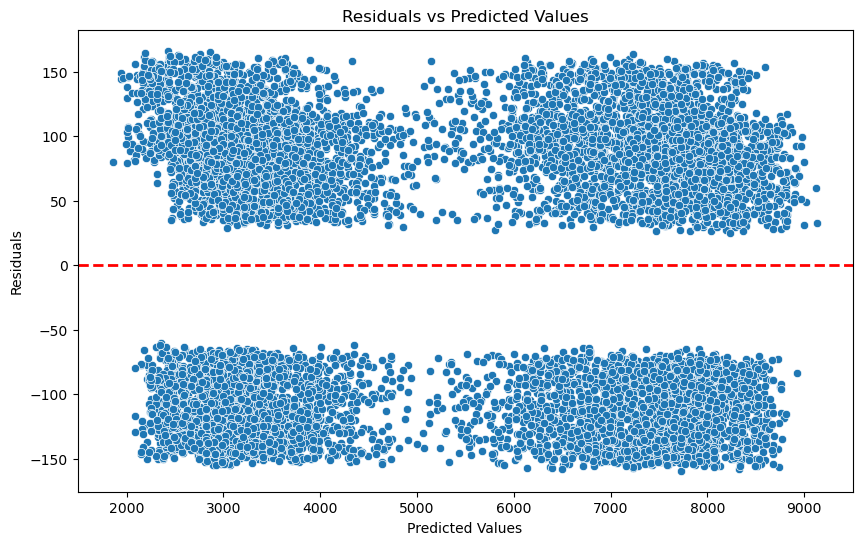

In [90]:
X = standardized_df[['high_blood', 'complication_risk', 'arthritis', 'diabetes', 'hyperlipidemia', 'back_pain',
                     'anxiety', 'allergic_rhinitis', 'reflux_esophagitis', 'initial_days', 'initial_admin_emergency']]
y = standardized_df.total_charge

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Get predicted values and residuals
predicted_values = results.predict(X)
residuals = results.resid

# Create a scatterplot of residuals versus predicted values
plt.figure(figsize=(10, 6))
sb.scatterplot(x=predicted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Below I have plotted each of the variables' residuals.

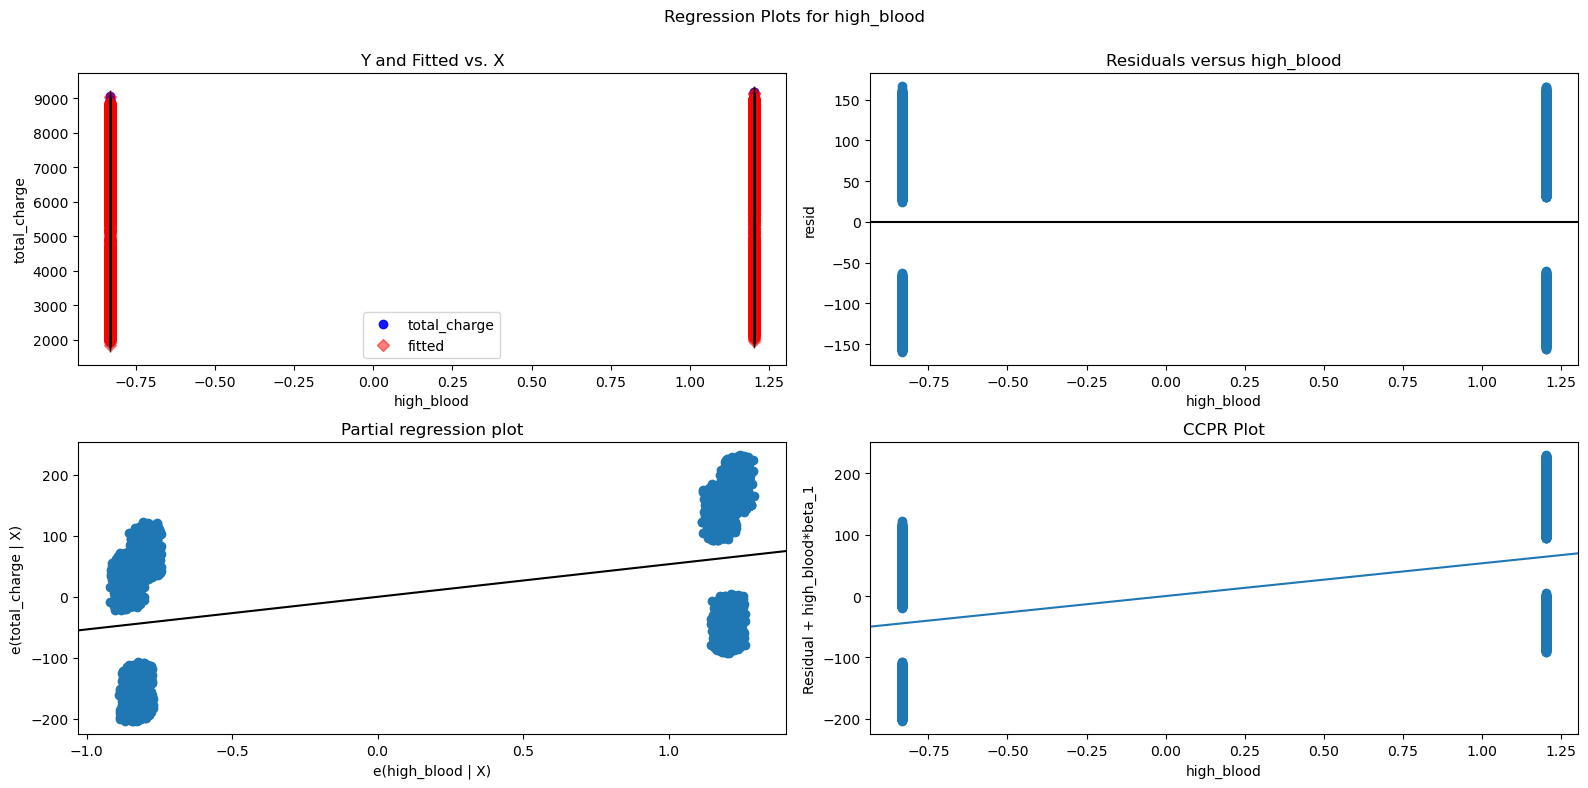

In [91]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'high_blood', fig=fig);

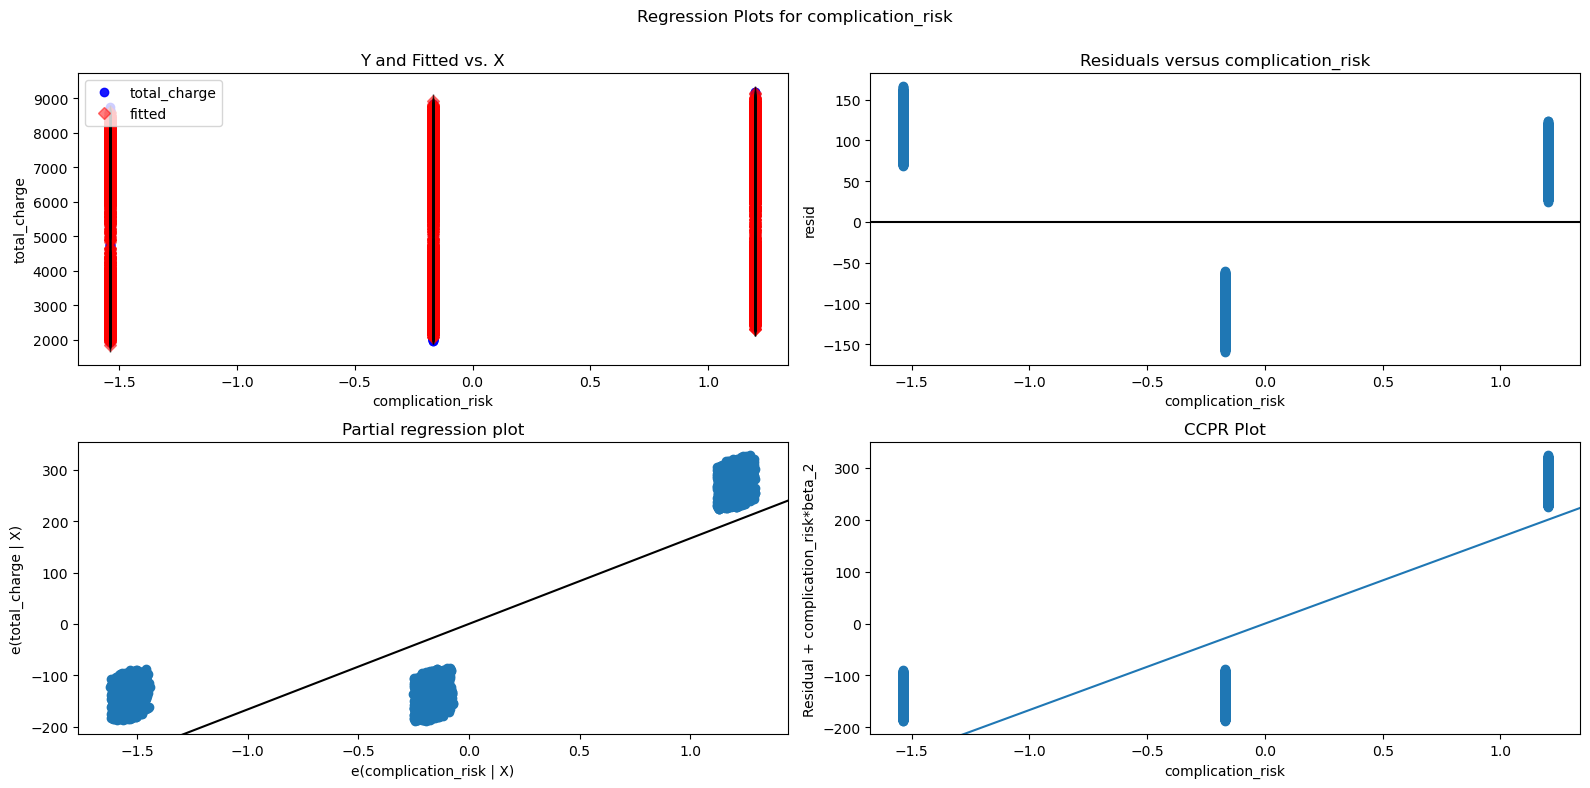

In [92]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'complication_risk', fig=fig);

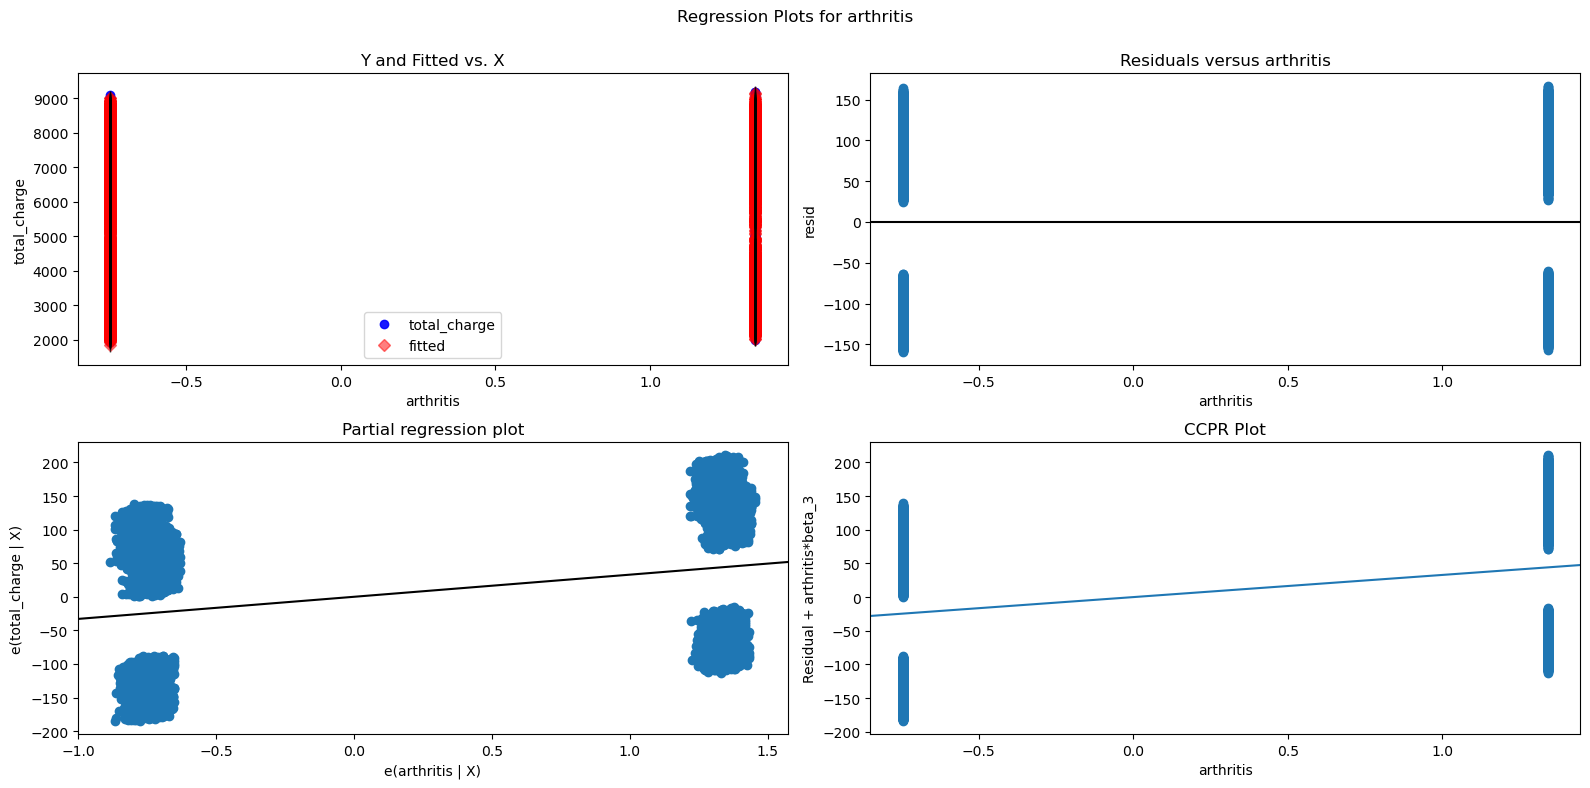

In [93]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'arthritis', fig=fig);

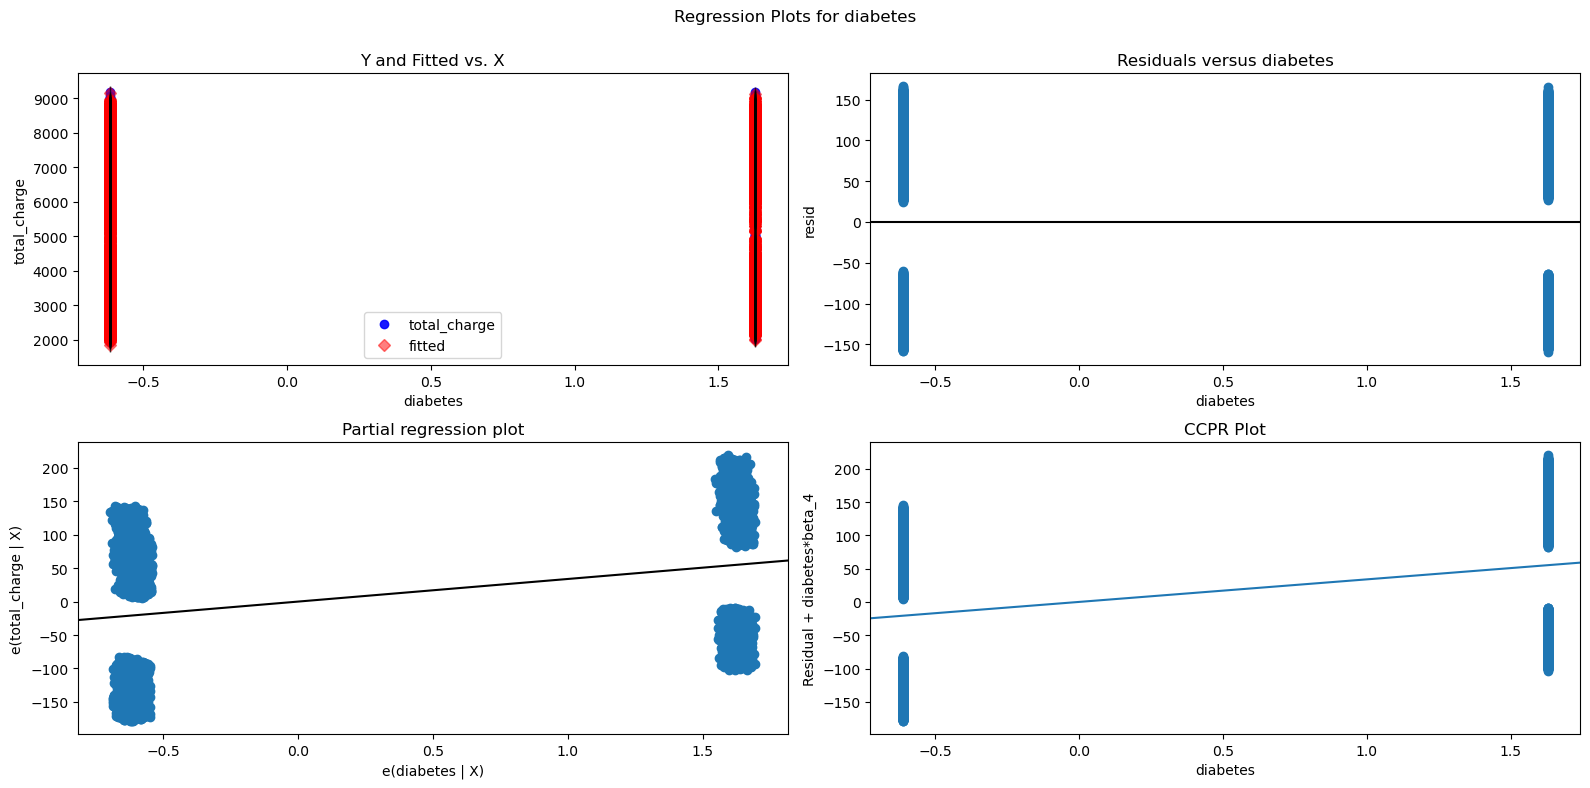

In [94]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'diabetes', fig=fig);

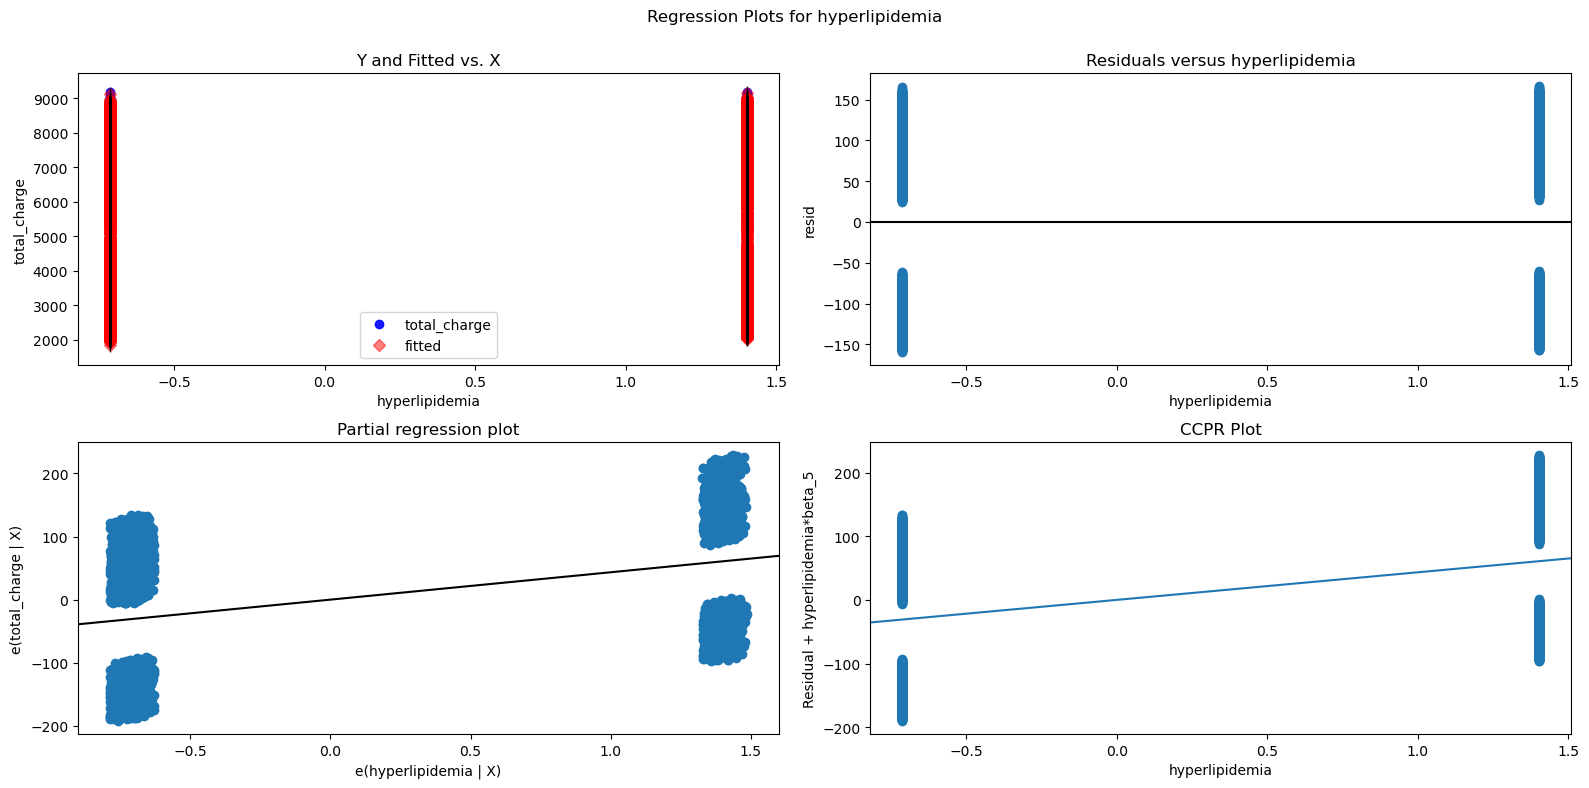

In [95]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'hyperlipidemia', fig=fig);

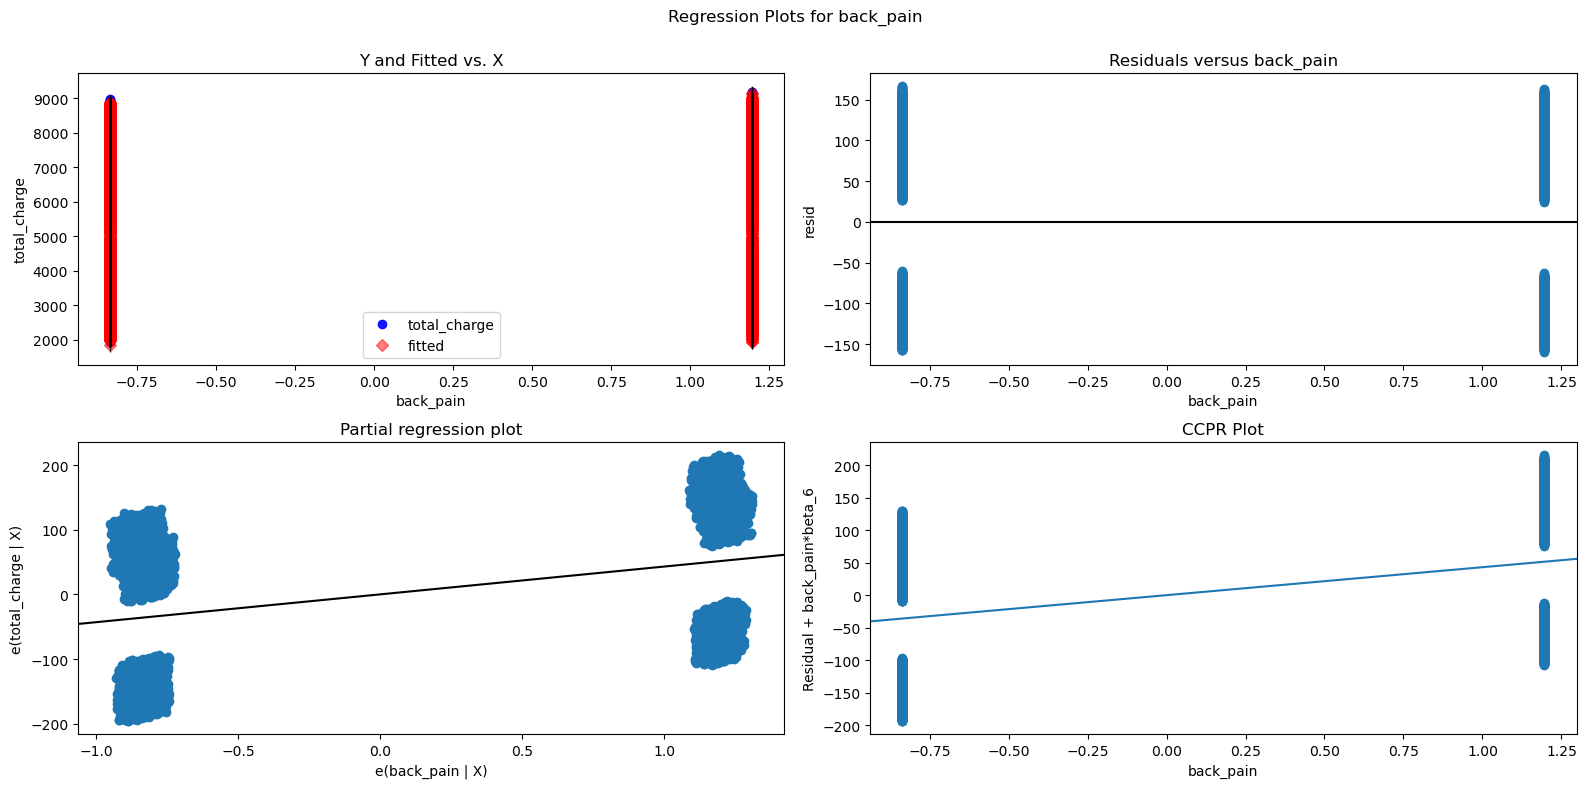

In [96]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'back_pain', fig=fig);

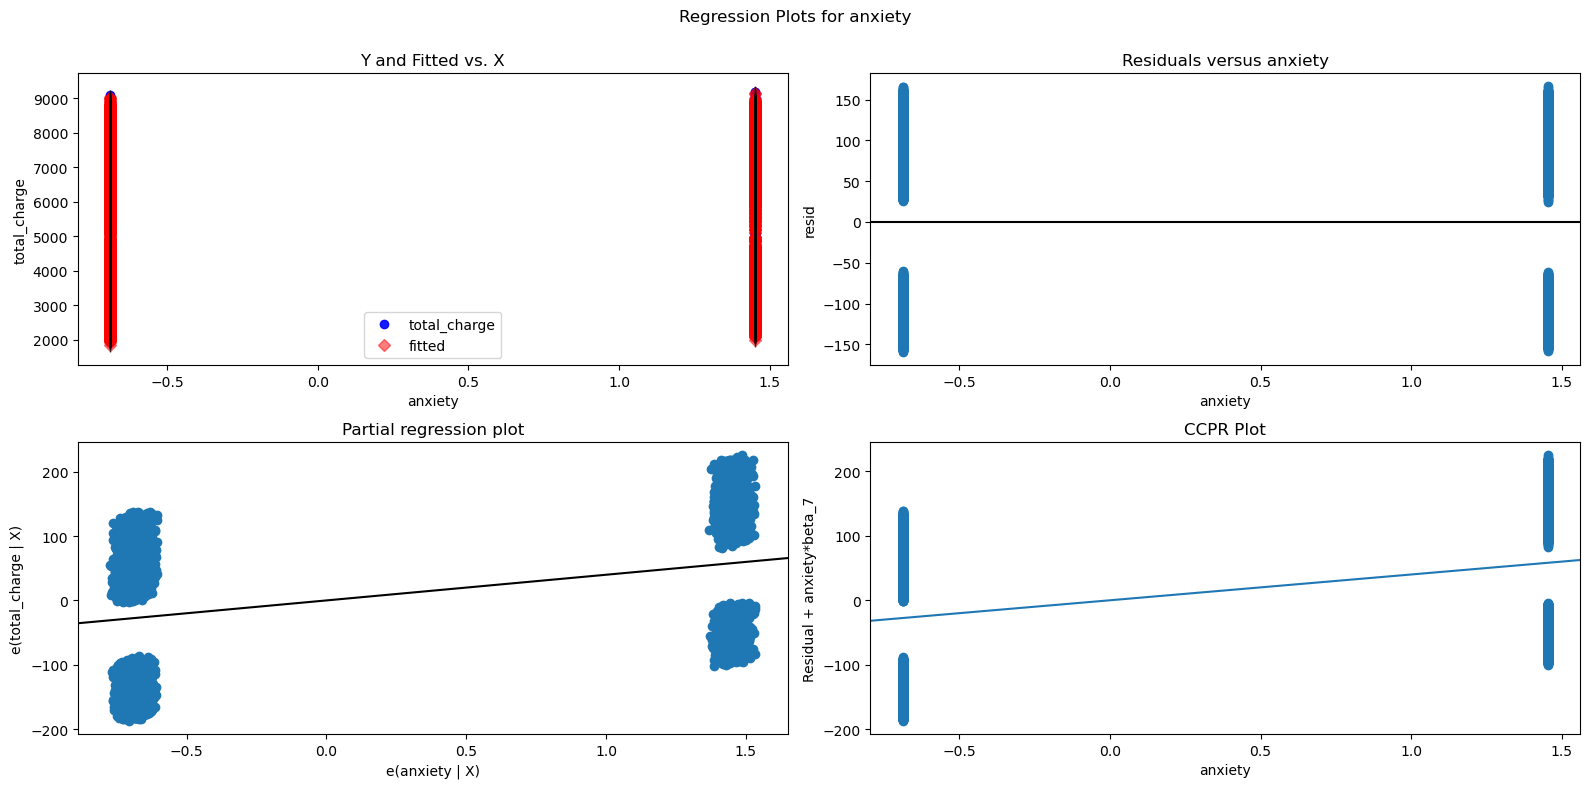

In [97]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'anxiety', fig=fig);

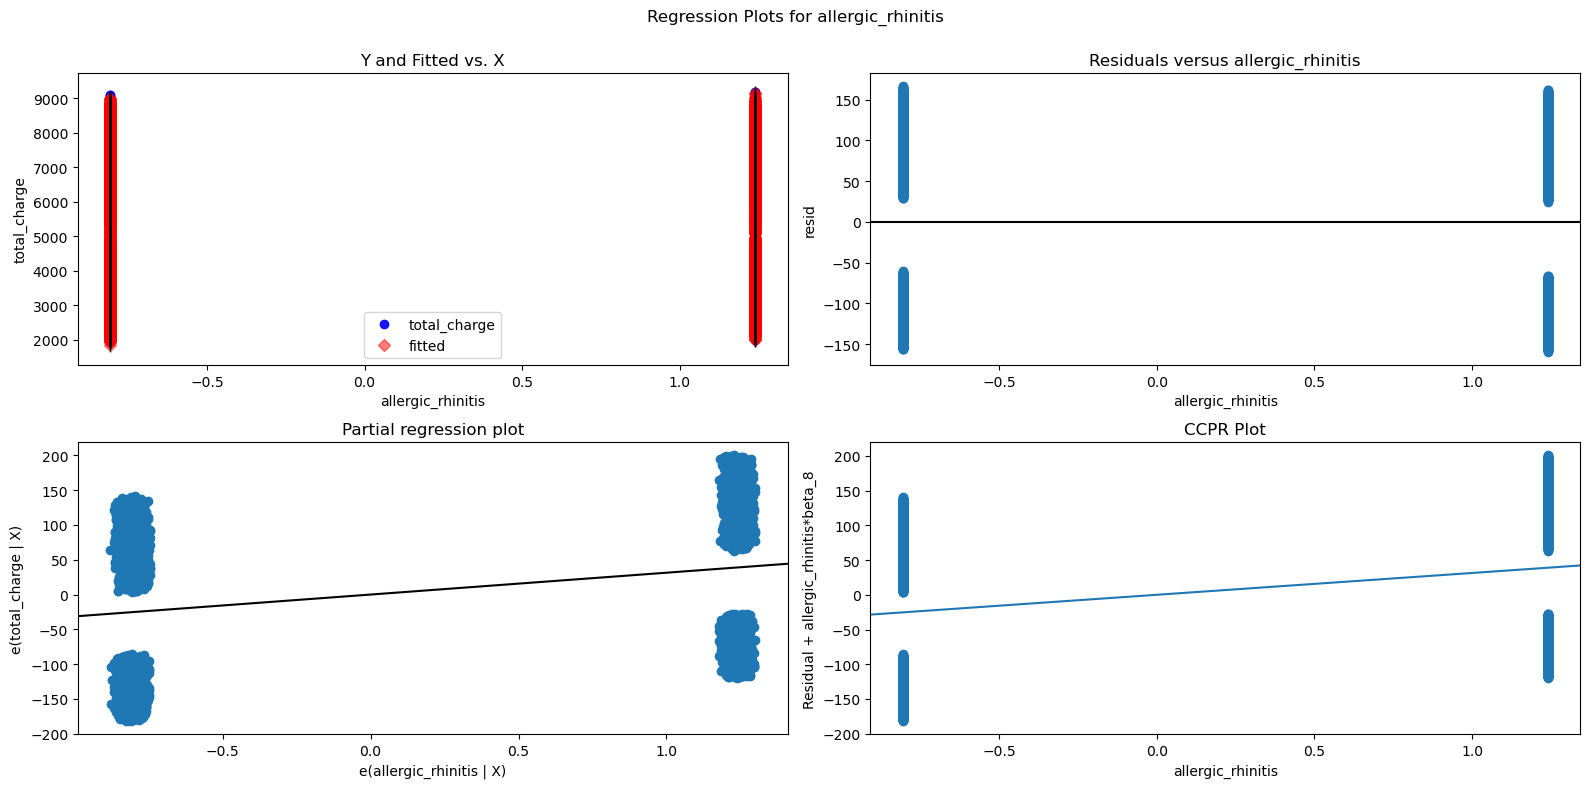

In [98]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'allergic_rhinitis', fig=fig);

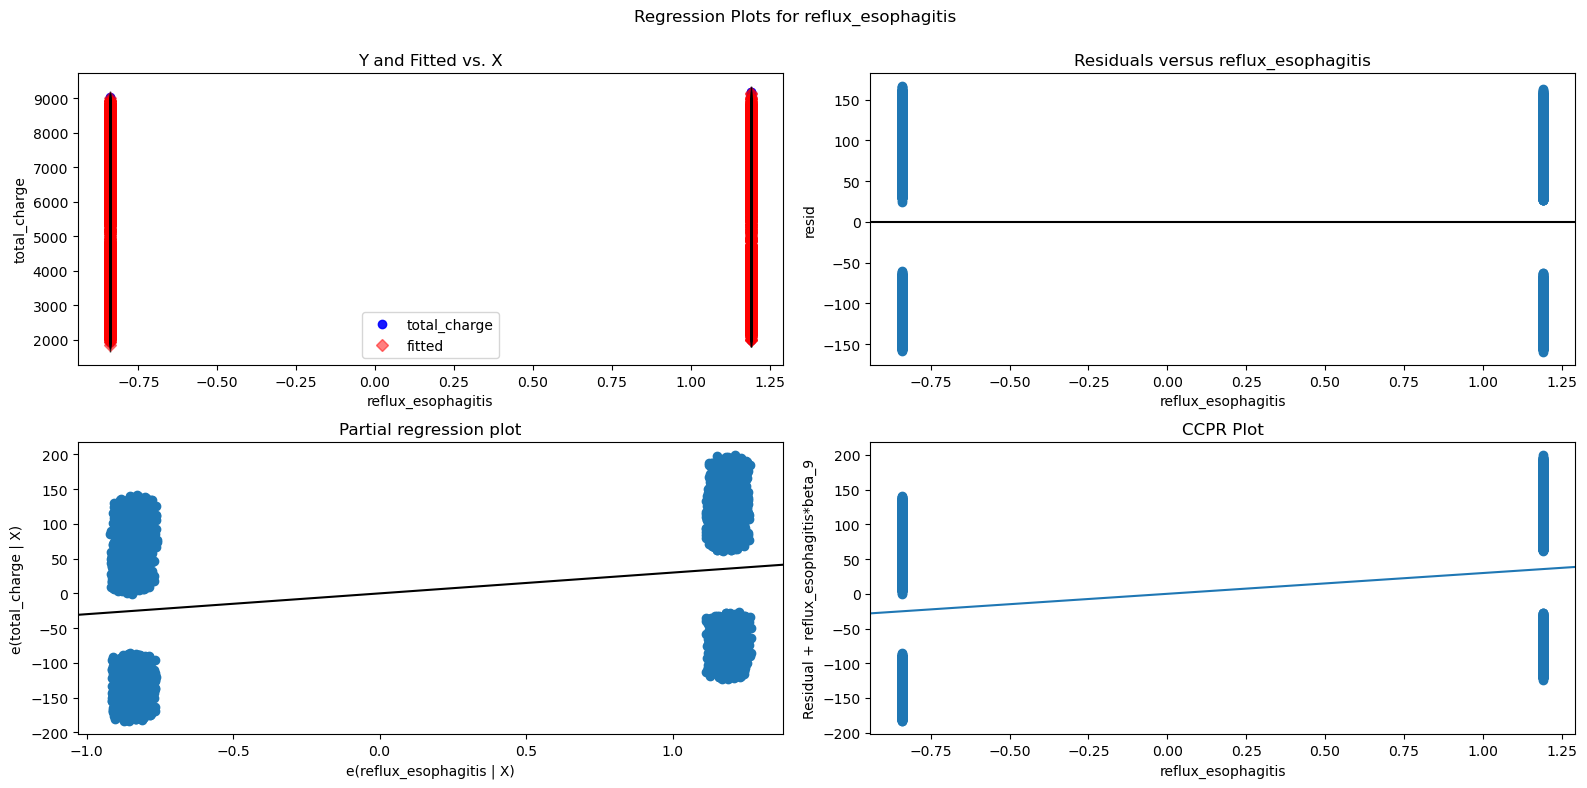

In [99]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'reflux_esophagitis', fig=fig);

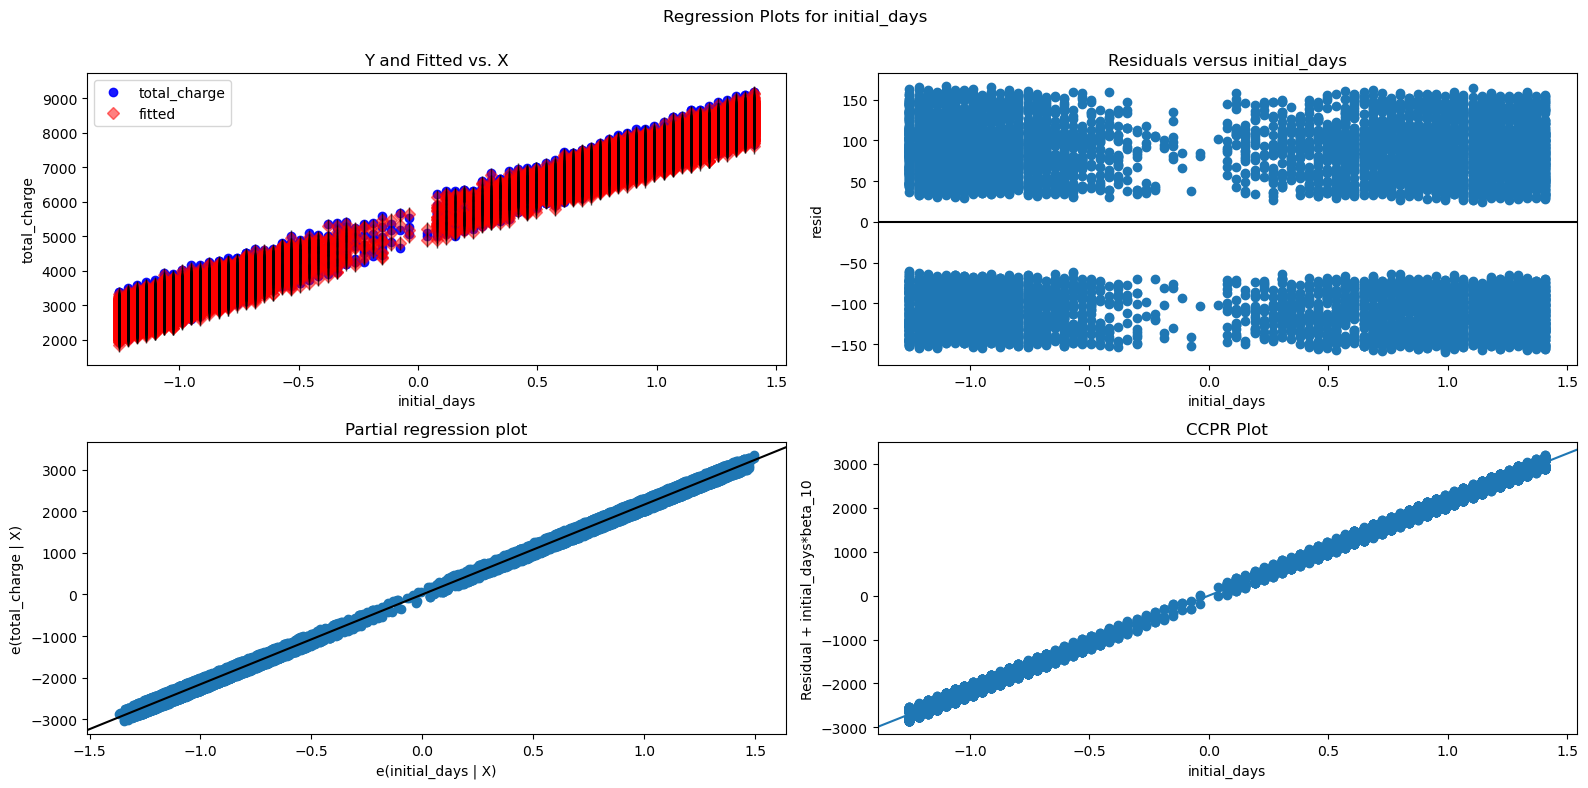

In [100]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'initial_days', fig=fig);

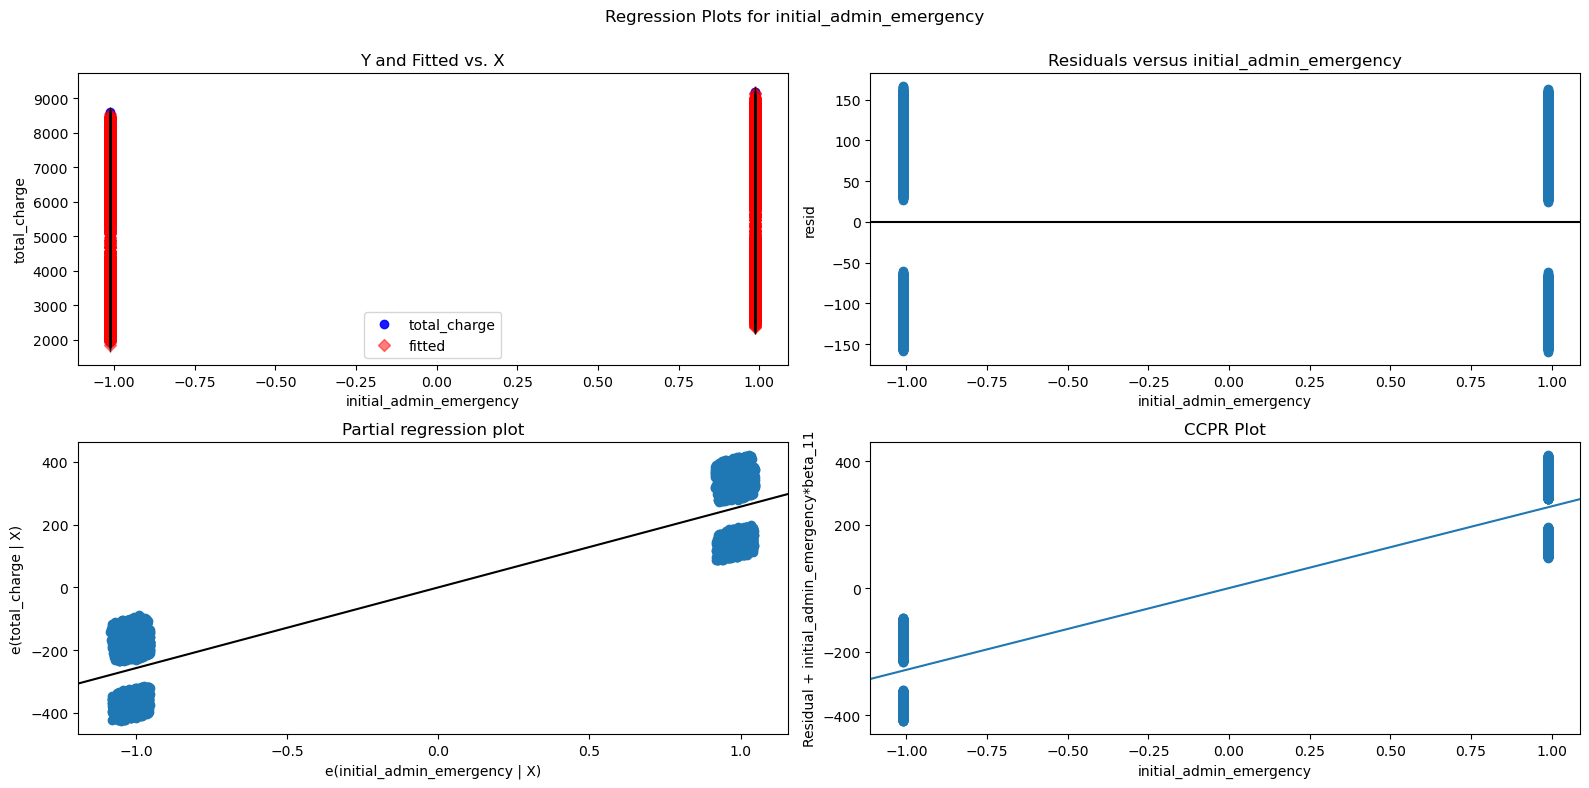

In [101]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'initial_admin_emergency', fig=fig);

### E3. Code

See above for the code used for this project.

## Part 5. Data Summary and Implications
### F1. Regression Equation, etc

The regression equation for the given model is as follows:

$ŷ = 5312.1728 + 53.3801(high blood) + 166.7845(complication risk) + 32.9072(arthritis) + 33.8048(diabetes) + 43.2782(hyperlipidemia) + 43.1074(back pain) + 39.7328(anxiety) + 31.4862(allergic rhinitis) + 29.9250(reflux esophagitis) + 2156.9087(initial days) + 257.2808(initial admin emergency)$

This equation represents the relationship between the dependent variable (total_charge) and the independent variables (high_blood, complication_risk, arthritis, diabetes, hyperlipidemia, back_pain, anxiety, allergic_rhinitis, reflux_esophagitis, initial_days, initial_admin_emergency) in the model. Each coefficient represents the change in the dependent variable for a one-unit change in the corresponding independent variable, holding other variables constant. Or:

- Keeping all things constant, having high blood pressure is associated with a 53.38 unit increase in the total cost. 
- Keeping all things constant, one step up in complication Risk is associated with a 166.78 unit increase in the total cost. 
- Keeping all things constant, having arthritis is associated with a 32.9072 unit increase in the total cost. 
- Keeping all things constant, having diabetes is associated with a 33.8048 unit increase in the total cost. 
- Keeping all things constant, having hyperlipidemia is associated with a 43.2782 unit increase in the total cost. 
- Keeping all things constant, having back pain is associated with a 43.1074 unit increase in the total cost. 
- Keeping all things constant, having anxiety is associated with a 39.7328 unit increase in the total cost. 
- Keeping all things constant, having allergic rhinitis is associated with a 31.4862 unit increase in the total cost. 
- Keeping all things constant, having reflux esophagitis is associated with a 29.9250 unit increase in the total cost. 
- Keeping all things constant, one unit increase in the initial days is associated with a 2156.9087 unit increase in the total cost. 
- Keeping all things constant, emergency initial admission is associated with a 257.2808 unit increase in the total cost. 

We know that the model is statistically significant. This is shown through the p values of the model and all of the independent variables being 0.00. What this means is that the variables have a significant role in the change of the dependent variable, the total cost. This also means that the model would give similar results if given a new dataset. 

While the model is statistically significant that does not mean that it is practically significant. The model shows that the largest increase in total cost is associated with the initial days spent in hospital. This is excepted as the highest cost to a hospital is a used bed. Knowing that the longer a patient spends in hospital increases the cost to the patient is an important metric to confirm. However, practically, knowing this does not help the hospital or the patient keep the cost down because this doesn't give us any insight into why patient's have long hospital stays. 

Likewise it is useful to know what variables may drive up the cost to the patient but there isn't much we can do about the various conditions that cause the increase in cost. A patient has no control over conditions like anxiety, complication risks, diabetes, etc. Neither does the hospital have the ability to control for those conditions as well. 

Keeping the cost of hospitalization down for the patient is extremely important for public health and for the hospitals themselves. Knowing some of the variables that are statistically significant in driving cost up can lead to further work that can help low costs however this study and model itself do not have practical significance for business improvement. 

### F2. Recommendations

Considering the limitations of the dataset and the imperfections in the model it would be irresponble to make recommendations for the hospital to implement. However the findings from this model can lead to further study that could be helpful. Given that we are looking at the cost to the patient of hospitalizion and we have several conditions that are statistically significant in raising the cost, it would be helpful for the hospital to create another study that breaks down the cost to the patient further and focuses on how patient health conditions influence that cost. For example, the model found that having anxiety raises the cost to a patient appoximately $40. What the model and the dataset doesn't tell us is what could be causing that increase in price. Implementing a study to look into what costs are associated with anxiety in patients (or any of the other statistically significant variables) would be a great next step to narrowing down exactly how costs are raised and how a hospital could keep the prices down for the patient. 

## Part 6. Demonstration
### G. Panopto Video

## Sources
### H. Web Sources

Sources used to assist with the coding of this project: 

- D208 Webinars and powerpoints were used to help create the regression model, residual plots, and code for one hot encoding. 
- D208 Datacamp pathway was used to help create much of the code.
- [Standardization in Python](https://www.askpython.com/python/examples/standardize-data-in-python) was used to create the code for standardizing the data

### I. Source references

Sources used to assist with interpretation, coding, and the project overall:

- [Assumptions of Linear Regression](https://www.statology.org/multiple-linear-regression-assumptions/)
- [WGU Python vs R](https://www.wgu.edu/online-it-degrees/programming-languages/r-or-python.html#transcriptPop)
- [Pandas User Guide](https://pandas.pydata.org/docs/getting_started/overview.html)
- [NumPy User Guide](https://numpy.org/devdocs/user/whatisnumpy.html)
- [MatPlotLib User Guide](https://matplotlib.org/stable/users/explain/quick_start.html)
- [Seaborn User Guide](https://seaborn.pydata.org/tutorial/introduction.html)
- [SciPy User Guide](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)
- [Scikit Learn User Guide](https://scikit-learn.org/stable/user_guide.html)